<font size="6"><b> Exploratory Data Analysis</font></b>
<font size="3"><br>Problem - House Prices Prediction</font></br>
<font size="3"><br>Data - https://www.kaggle.com/c/house-prices-advanced-regression-techniques</font></br>

# Loading Libraries
Major Libraries We Will be using
- Pandas, Numpy => for Data Wrangling
- matplotlib, seaborn => For Plots
- scipy => Basic Stats
- sklearn => For Basic Data Processing for ML

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
import ppscore

warnings.filterwarnings('ignore')
%matplotlib inline

%load_ext autoreload
%autoreload 2

## Some Self Created Functions

In [4]:
def iqr(x):
    return x.quantile(q=0.75) - x.quantile(q=0.25)

## Outlier > 75th %tile + 1.5IQR & < 25th %tile - 1.5IQR
def outlier_count(x):
    upper_out = x.quantile(q=0.75) + 1.5 * iqr(x)
    lower_out = x.quantile(q=0.25) - 1.5 * iqr(x)

    return len(x[x > upper_out]) + len(x[x < lower_out])

## Outlier > 75th %tile + 1.5IQR & < 25th %tile - 1.5IQR
def remove_outlier(x):
    upper_out = x.quantile(q=0.75) + 1.5 * iqr(x)
    lower_out = x.quantile(q=0.25) - 1.5 * iqr(x)
    return x[(x <= upper_out) & (x >= lower_out)]

In [5]:
class UnivariatePlotUtility(object):

    def __init__(self, x):
        self.x = x

    def num_plot(self):
        bins = max(round(self.x.nunique()/100), min(self.x.nunique(), 10))
        ax = sns.distplot(self.x, kde=True, hist=True, bins=bins, rug=False, color='C3')
        plt.xticks(rotation=45)
        #plt.show()

    def non_outlier_num_plot(self):
        x = remove_outlier(self.x)
        bins = max(round(x.nunique()/100), min(x.nunique(), 10))
        ax = sns.distplot(x, kde=True, hist=True, bins=bins, rug=False, color='C4')
        plt.xticks(rotation=45)
        #plt.show()

    def cat_plot(self):
        plt.hist(self.x)
        plt.xticks(rotation=90)
        #plt.show()

    def distribution_plot(self):
        if self.x.dtypes == 'object' or self.x.dtypes == 'bool':
            self.cat_plot()
        else:
            self.num_plot()

    def non_outlier_distribution_plot(self):
        if self.x.dtypes == 'object' or self.x.dtypes == 'bool':
            self.cat_plot()
        else:
            self.non_outlier_num_plot()

# Exploratory Data Analysis
<b> What is EDA?? </b>
<br>Exploratory Data Analysis (EDA) is an approach/philosophy for data analysis that employs a variety of techniques to</br>
- Maximize insight into a data set;
- Uncover underlying structure;
- Extract important variables;
- Detect outliers and anomalies;
- Test underlying assumptions;

<b><font size="3"> In this session we will be covering </font></b>
<br><b>1. Understanding the Problem => </b>Do a philosophical analysis about meaning and importance of variable for this problem</br>
<br><b>2. Univariate Analysis => </b>Check Each Variable From Statistical lense</br>
<br><b>3. Multivariate Analysis => </b>Understand how the dependent variable and independent variables relate</br>
<br><b>4. Basic cleaning => </b>Clean the dataset and handle the missing data, outliers and categorical variables</br>
<br><b>5. Test assumptions => </b>Check if our data meets the assumptions required by most multivariate techniques</br>

## Lets Load the Data

In [6]:
df_train = pd.read_csv('train.csv')

### Data Dimension

In [7]:
df_train.shape

(1460, 81)

### How Data Looks Like

In [8]:
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

### Columns

In [9]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## Understanding Data
Univarite Study
- Overview of Data
- How is my target variable
- How Other Variables looks like

### Data Overview

In [10]:
def data_information(df, id_cols):
    ## Removing ID columns
    df = df.drop(columns=id_cols)

    ## Creating Empty Data Frame
    data_info = pd.DataFrame(np.random.randn(0, 12) * 0,
                             columns=['No. of Observations (Nrow)',
                                      'No. of Variables (Ncol)',
                                      'No. of Numeric Variables',
                                      'No. of Factor Variables',
                                      'No. of Categorical Variables',
                                      'No. of Logical Variables',
                                      'No. of Date Variables',
                                      'No. of Zero variance Variables (Uniform)',
                                      '% of Variables having complete cases',
                                      '% of Variables having <=50% missing cases',
                                      '% of Variables having >50% missing cases',
                                      '% of Variables having >90% missing cases'])

    ## Data Inofrmation
    data_info.loc[0, 'No. of Observations (Nrow)'] = df.shape[0]
    data_info.loc[0, 'No. of Variables (Ncol)'] = df.shape[1]
    data_info.loc[0, 'No. of Numeric Variables'] = df._get_numeric_data().shape[1]
    data_info.loc[0, 'No. of Factor Variables'] = df.select_dtypes(include='category').shape[1]
    data_info.loc[0, 'No. of Logical Variables'] = df.select_dtypes(include='bool').shape[1]
    data_info.loc[0, 'No. of Categorical Variables'] = df.select_dtypes(include='object').shape[1]
    data_info.loc[0, 'No. of Date Variables'] = df.select_dtypes(include='datetime64').shape[1]
    data_info.loc[0, 'No. of Zero variance Variables (Uniform)'] = df.loc[:, df.apply(pd.Series.nunique) == 1].shape[1]

    null_per = pd.DataFrame(df.isnull().sum()/df.shape[0])
    null_per.columns = ['null_per']

    data_info.loc[0, '% of Variables having complete cases'] = null_per[null_per.null_per == 0].shape[0] * 100 / \
                                                               df.shape[1]
    data_info.loc[0, '% of Variables having <=50% missing cases'] = null_per[null_per.null_per <= 0.50].shape[0] * 100 / \
                                                                    df.shape[1]
    data_info.loc[0, '% of Variables having >50% missing cases'] = null_per[null_per.null_per > 0.50].shape[0] * 100 / \
                                                                   df.shape[1]
    data_info.loc[0, '% of Variables having >90% missing cases'] = null_per[null_per.null_per > 0.90].shape[0] * 100 / \
                                                                   df.shape[1]

    ## Transposing Data to get in consumable format
    data_info = data_info.transpose()
    data_info.columns = ['Value']
    data_info['Value'] = data_info['Value'].astype(int)

    return data_info

In [11]:
id_cols = ['Id','SalePrice']
data_information(df_train, id_cols)

Value
No. of Observations (Nrow)                  1460
No. of Variables (Ncol)                       79
No. of Numeric Variables                      36
No. of Factor Variables                        0
No. of Categorical Variables                  43
No. of Logical Variables                       0
No. of Date Variables                          0
No. of Zero variance Variables (Uniform)       0
% of Variables having complete cases          75
% of Variables having <=50% missing cases     94
% of Variables having >50% missing cases       5
% of Variables having >90% missing cases       3

<b> Findings </b>
* Total Variables - 79
* Numeric Variables - 36
* Categorical - 43
* 75 Variables Does not have Nulls
* 19 has <=50% Null Values
* 5 has >50% Null Values
* 3 has >90% Null Values

### How are you my target 'SalePrice'?

In [12]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

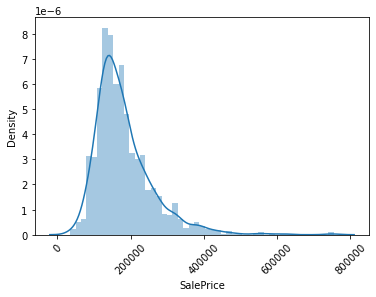

In [13]:
sns.distplot(df_train['SalePrice'])
plt.xticks(rotation=45);

In [14]:
#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


### Basic Summary of Numerical Features

In [15]:
def num_count_summary(df, id_cols):

    df_num = df.drop(columns=id_cols)._get_numeric_data()

    data_info_num = pd.DataFrame()
    ## Counts Stats on Numeric Variable
    try:  ## incase numeric variables not present
        i = 0
        for c in df_num.columns:
            data_info_num.loc[c, 'Negative Values Count'] = df_num[df_num[c] < 0].shape[0]
            data_info_num.loc[c, 'Positive Values Count'] = df_num[df_num[c] > 0].shape[0]
            data_info_num.loc[c, 'Zeros Count'] = df_num[df_num[c] == 0].shape[0]
            data_info_num.loc[c, 'Unique Count'] = len(df_num[c].unique())
            data_info_num.loc[c, 'Negative Infinity Count'] = df_num[df_num[c] == -np.inf].shape[0]
            data_info_num.loc[c, 'Positive Infinity Count'] = df_num[df_num[c] == np.inf].shape[0]
            data_info_num.loc[c, 'Missing Percentage'] = df_num[df_num[c].isnull()].shape[0] / df_num.shape[0]
            data_info_num.loc[c, 'Count of Outliers'] = outlier_count(df_num[c])
            i = i + 1
    except:
        pass
    print("Outlier >75th %tile + 1.5IQR & <25th %tile - 1.5IQR")
    return data_info_num

In [16]:
num_count_summary(df_train, ['Id','SalePrice'])

Outlier >75th %tile + 1.5IQR & <25th %tile - 1.5IQR


Negative Values Count  Positive Values Count  Zeros Count  \
MSSubClass                       0.0                 1460.0          0.0   
LotFrontage                      0.0                 1201.0          0.0   
LotArea                          0.0                 1460.0          0.0   
OverallQual                      0.0                 1460.0          0.0   
OverallCond                      0.0                 1460.0          0.0   
YearBuilt                        0.0                 1460.0          0.0   
YearRemodAdd                     0.0                 1460.0          0.0   
MasVnrArea                       0.0                  591.0        861.0   
BsmtFinSF1                       0.0                  993.0        467.0   
BsmtFinSF2                       0.0                  167.0       1293.0   
BsmtUnfSF                        0.0                 1342.0        118.0   
TotalBsmtSF                      0.0                 1423.0         37.0   
1stFlrSF                         0.0                 1460.0          0.0   
2ndFlrSF                         0.0                  631.0        829.0   
LowQualFinSF                     0.0                   26.0       1434.0   
GrLivArea                        0.0                 1460.0          0.0   
BsmtFullBath                     0.0                  604.0        856.0   
BsmtHalfBath                     0.0                   82.0       1378.0   
FullBath                         0.0                 1451.0          9.0   
HalfBath                         0.0                  547.0        913.0   
BedroomAbvGr                     0.0                 1454.0          6.0   
KitchenAbvGr                     0.0                 1459.0          1.0   
TotRmsAbvGrd                     0.0                 1460.0          0.0   
Fireplaces                       0.0                  770.0        690.0   
GarageYrBlt                      0.0                 1379.0          0.0   
GarageCars                       0.0                 1379.0         81.0   
GarageArea                       0.0                 1379.0         81.0   
WoodDeckSF                       0.0                  699.0        761.0   
OpenPorchSF                      0.0                  804.0        656.0   
EnclosedPorch                    0.0                  208.0       1252.0   
3SsnPorch                        0.0                   24.0       1436.0   
ScreenPorch                      0.0                  116.0       1344.0   
PoolArea                         0.0                    7.0       1453.0   
MiscVal                          0.0                   52.0       1408.0   
MoSold                           0.0                 1460.0          0.0   
YrSold                           0.0                 1460.0          0.0   

               Unique Count  Negative Infinity Count  Positive Infinity Count  \
MSSubClass             15.0                      0.0                      0.0   
LotFrontage           111.0                      0.0                      0.0   
LotArea              1073.0                      0.0                      0.0   
OverallQual            10.0                      0.0                      0.0   
OverallCond             9.0                      0.0                      0.0   
YearBuilt             112.0                      0.0                      0.0   
YearRemodAdd           61.0                      0.0                      0.0   
MasVnrArea            328.0                      0.0                      0.0   
BsmtFinSF1            637.0                      0.0                      0.0   
BsmtFinSF2            144.0                      0.0                      0.0   
BsmtUnfSF             780.0                      0.0                      0.0   
TotalBsmtSF           721.0                      0.0                      0.0   
1stFlrSF              753.0                      0.0                      0.0   
2ndFlrSF              417.0                      0.0                

<b> Findings </b>
- BsmtFinSF2, LowQualFinSF, BsmtHalfBath, EnclosedPorch, ScreenPorch, PoolArea, MiscVal has High Values as 0
- MSSubClass, OverallQual, OverallCond, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenAbvGr, Fireplaces, GarageCars, PoolArea has very few unique values
- MSSubClass, OverallQual can be converted to categorical feature

In [17]:
for col in ['MSSubClass','OverallQual']:
    df_train[col] = df_train[col].astype('object')

### Basic Summary of Categorcial Features

In [18]:
def cat_count_summary(df, id_cols):

    df_cat = df.drop(columns=id_cols).select_dtypes(['object', 'bool'])

    data_info_cat = pd.DataFrame()
    ## Counts Stats on Categorical Variable
    try:  ## incase Categorical variables not present
        for c in df_cat.columns:
            data_info_cat.loc[c, 'Unique Categories'] = len(df_cat[c].unique())
            data_info_cat.loc[c, 'Missing Percentage'] = (df_cat[df_cat[c].isnull()].shape[0]*100) / df_cat.shape[0]
    except:
        pass
    return data_info_cat

In [19]:
cat_count_summary(df_train, ['Id','SalePrice'])

Unique Categories  Missing Percentage
MSSubClass                  15.0            0.000000
MSZoning                     5.0            0.000000
Street                       2.0            0.000000
Alley                        3.0           93.767123
LotShape                     4.0            0.000000
LandContour                  4.0            0.000000
Utilities                    2.0            0.000000
LotConfig                    5.0            0.000000
LandSlope                    3.0            0.000000
Neighborhood                25.0            0.000000
Condition1                   9.0            0.000000
Condition2                   8.0            0.000000
BldgType                     5.0            0.000000
HouseStyle                   8.0            0.000000
OverallQual                 10.0            0.000000
RoofStyle                    6.0            0.000000
RoofMatl                     8.0            0.000000
Exterior1st                 15.0            0.000000
Exterior2nd                 16.0            0.000000
MasVnrType                   5.0            0.547945
ExterQual                    4.0            0.000000
ExterCond                    5.0            0.000000
Foundation                   6.0            0.000000
BsmtQual                     5.0            2.534247
BsmtCond                     5.0            2.534247
BsmtExposure                 5.0            2.602740
BsmtFinType1                 7.0            2.534247
BsmtFinType2                 7.0            2.602740
Heating                      6.0            0.000000
HeatingQC                    5.0            0.000000
CentralAir                   2.0            0.000000
Electrical                   6.0            0.068493
KitchenQual                  4.0            0.000000
Functional                   7.0            0.000000
FireplaceQu                  6.0           47.260274
GarageType                   7.0            5.547945
GarageFinish                 4.0            5.547945
GarageQual                   6.0            5.547945
GarageCond                   6.0            5.547945
PavedDrive                   3.0            0.000000
PoolQC                       4.0           99.520548
Fence                        5.0           80.753425
MiscFeature                  5.0           96.301370
SaleType                     9.0            0.000000
SaleCondition                6.0            0.000000

### Statistical Summary of Numerical Features

In [20]:
def stats_summary(df, id_cols):

    df_num = df.drop(columns=id_cols)._get_numeric_data()

    data_stat_num = pd.DataFrame()

    ## Distribution Of Numeric Variables
    try:  ## incase Numeric variables not present
        data_stat_num = pd.concat([df_num.describe().transpose(),
                                   pd.DataFrame(df_num.quantile(q=0.10)),
                                   pd.DataFrame(df_num.quantile(q=0.90)),
                                   pd.DataFrame(df_num.quantile(q=0.95))], axis=1)
        data_stat_num.columns = ['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', '10%', '90%', '95%']
    except:
        pass

    return data_stat_num

In [21]:
stats_summary(df_train, id_cols)

count          mean          std     min      25%     50%  \
LotFrontage    1201.0     70.049958    24.284752    21.0    59.00    69.0   
LotArea        1460.0  10516.828082  9981.264932  1300.0  7553.50  9478.5   
OverallCond    1460.0      5.575342     1.112799     1.0     5.00     5.0   
YearBuilt      1460.0   1971.267808    30.202904  1872.0  1954.00  1973.0   
YearRemodAdd   1460.0   1984.865753    20.645407  1950.0  1967.00  1994.0   
MasVnrArea     1452.0    103.685262   181.066207     0.0     0.00     0.0   
BsmtFinSF1     1460.0    443.639726   456.098091     0.0     0.00   383.5   
BsmtFinSF2     1460.0     46.549315   161.319273     0.0     0.00     0.0   
BsmtUnfSF      1460.0    567.240411   441.866955     0.0   223.00   477.5   
TotalBsmtSF    1460.0   1057.429452   438.705324     0.0   795.75   991.5   
1stFlrSF       1460.0   1162.626712   386.587738   334.0   882.00  1087.0   
2ndFlrSF       1460.0    346.992466   436.528436     0.0     0.00     0.0   
LowQualFinSF   1460.0      5.844521    48.623081     0.0     0.00     0.0   
GrLivArea      1460.0   1515.463699   525.480383   334.0  1129.50  1464.0   
BsmtFullBath   1460.0      0.425342     0.518911     0.0     0.00     0.0   
BsmtHalfBath   1460.0      0.057534     0.238753     0.0     0.00     0.0   
FullBath       1460.0      1.565068     0.550916     0.0     1.00     2.0   
HalfBath       1460.0      0.382877     0.502885     0.0     0.00     0.0   
BedroomAbvGr   1460.0      2.866438     0.815778     0.0     2.00     3.0   
KitchenAbvGr   1460.0      1.046575     0.220338     0.0     1.00     1.0   
TotRmsAbvGrd   1460.0      6.517808     1.625393     2.0     5.00     6.0   
Fireplaces     1460.0      0.613014     0.644666     0.0     0.00     1.0   
GarageYrBlt    1379.0   1978.506164    24.689725  1900.0  1961.00  1980.0   
GarageCars     1460.0      1.767123     0.747315     0.0     1.00     2.0   
GarageArea     1460.0    472.980137   213.804841     0.0   334.50   480.0   
WoodDeckSF     1460.0     94.244521   125.338794     0.0     0.00     0.0   
OpenPorchSF    1460.0     46.660274    66.256028     0.0     0.00    25.0   
EnclosedPorch  1460.0     21.954110    61.119149     0.0     0.00     0.0   
3SsnPorch      1460.0      3.409589    29.317331     0.0     0.00     0.0   
ScreenPorch    1460.0     15.060959    55.757415     0.0     0.00     0.0   
PoolArea       1460.0      2.758904    40.177307     0.0     0.00     0.0   
MiscVal        1460.0     43.489041   496.123024     0.0     0.00     0.0   
MoSold         1460.0      6.321918     2.703626     1.0     5.00     6.0   
YrSold         1460.0   2007.815753     1.328095  2006.0  2007.00  2008.0   

                    75%       max     10%      90%       95%  
LotFrontage       80.00     313.0    44.0     96.0    107.00  
LotArea        11601.50  215245.0  5000.0  14381.7  17401.15  
OverallCond        6.00       9.0     5.0      7.0      8.00  
YearBuilt       2000.00    2010.0  1924.9   2006.0   2007.00  
YearRemodAdd    2004.00    2010.0  1950.0   2006.0   2007.00  
MasVnrArea       166.00    1600.0     0.0    335.0    456.00  
BsmtFinSF1       712.25    5644.0     0.0   1065.5   1274.00  
BsmtFinSF2         0.00    1474.0     0.0    117.2    396.20  
BsmtUnfSF        808.00    2336.0    74.9   1232.0   1468.00  
TotalBsmtSF     1298.25    6110.0   636.9   1602.2   1753.00  
1stFlrSF        1391.25    4692.0   756.9   1680.0   1831.25  
2ndFlrSF         728.00    2065.0     0.0    954.2   1141.05  
LowQualFinSF       0.00     572.0     0.0      0.0      0.00  
GrLivArea       1776.75    5642.0   912.0   2158.3   2466.10  
BsmtFullBath       1.00       3.0     0.0      1.0      1.00  
BsmtHalfBath       0.00       2.0     0.0      0.0      1.00  
FullBath           2.00       3.0     1.0      2.0      2.00  
HalfBath           1.00       2.0     0.0      1.0      1.00  
BedroomAbvGr       3.00       8.0     2.0      4.0      4.00  
KitchenAbvGr       1.00       3.0     1.0      1.0      1.00

### Some Univariate Visualization

In [22]:
class UnivariatePlotSummary(object):
    def __init__(self, df, id_cols):
        self.df = df
        self.id_cols = id_cols


    def density_plot(self):
        d = self.df.drop(columns = self.id_cols)
        for col in d.columns:
            print(col)
            UnivariatePlotUtility(d[d[col].notnull()][col]).distribution_plot()
            plt.xlabel(col)
            plt.ylabel('Count')
            plt.show()


    def non_outlier_density_plot(self):
        d = self.df.drop(columns = self.id_cols)
        for col in d.columns:
            UnivariatePlotUtility(d[d[col].notnull()][col]).non_outlier_distribution_plot()
            plt.xlabel(col)
            plt.ylabel('Count')
            plt.show()

    def box_plot(self):
        cols = self.df.drop(columns = self.id_cols)._get_numeric_data().columns

        for col in cols:
            sns.boxplot(x = self.df[self.df[col].notnull()][col], orient = 'v')
            plt.xlabel(col)
            plt.ylabel('Values')
            plt.show()


    def non_outlier_box_plot(self):
        cols = self.df.drop(columns = self.id_cols)._get_numeric_data().columns

        for col in cols:
            x = remove_outlier(self.df[self.df[col].notnull()][col])
            sns.boxplot(x = x, orient = 'v')
            plt.xlabel(col)
            plt.ylabel('Values')
            plt.show()

MSSubClass


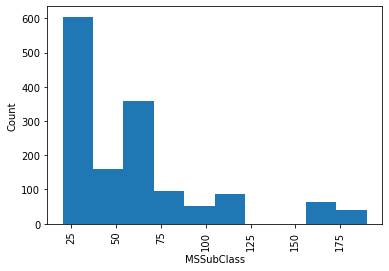

MSZoning


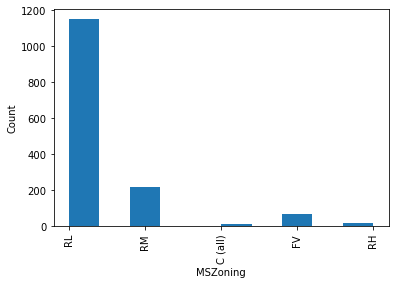

LotFrontage


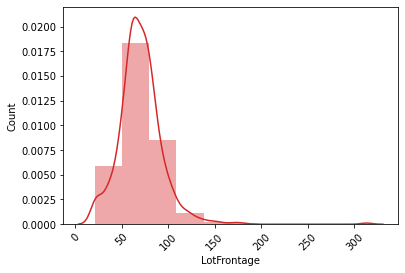

LotArea


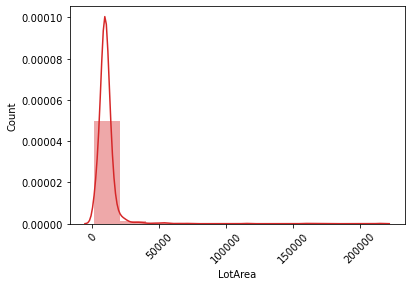

Street


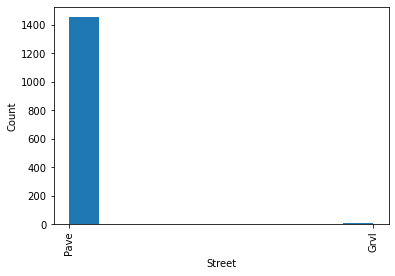

Alley


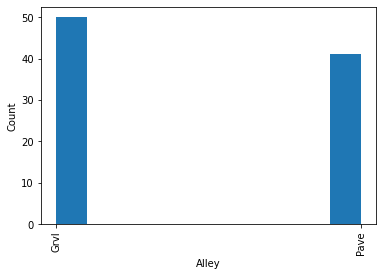

LotShape


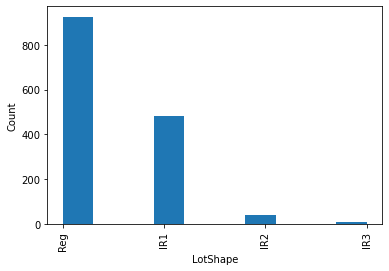

LandContour


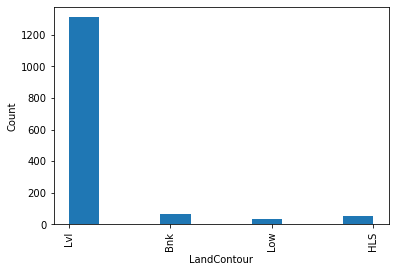

Utilities


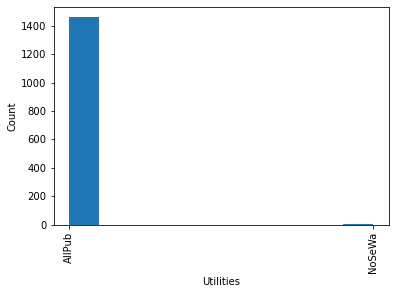

LotConfig


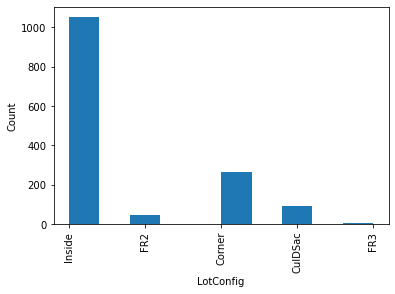

LandSlope


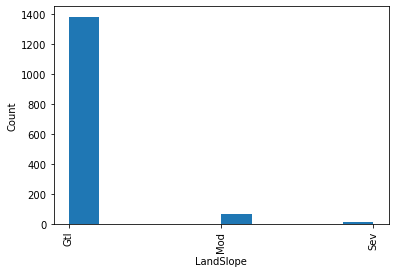

Neighborhood


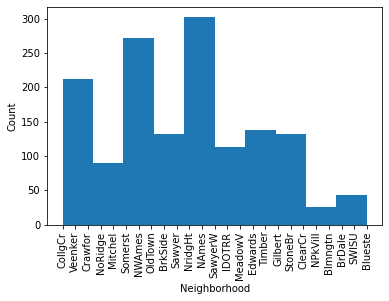

Condition1


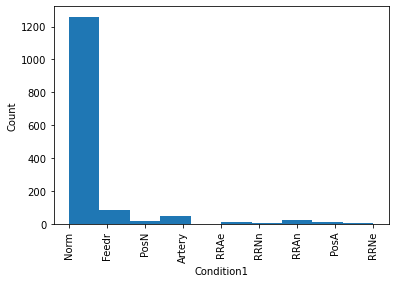

Condition2


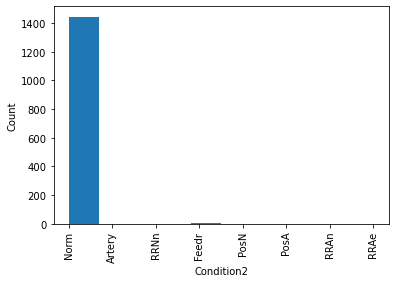

BldgType


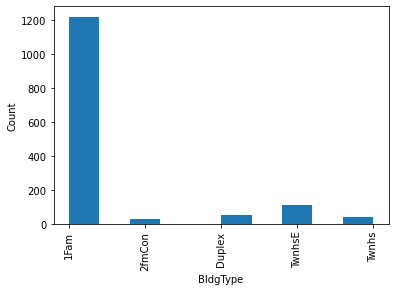

HouseStyle


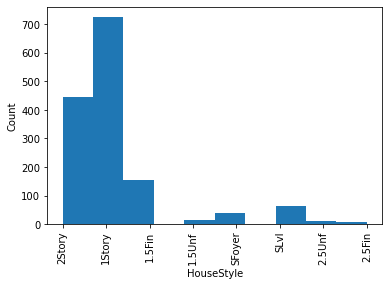

OverallQual


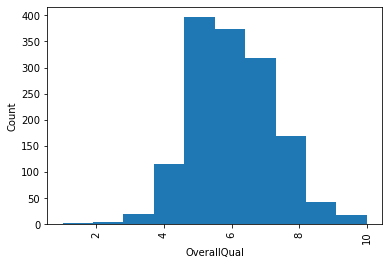

OverallCond


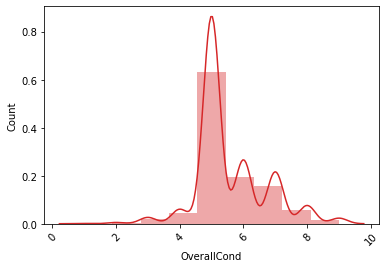

YearBuilt


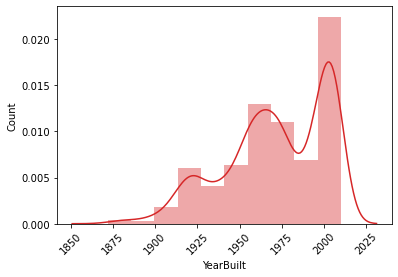

YearRemodAdd


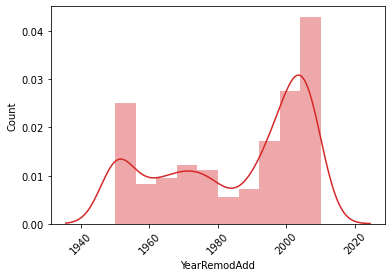

RoofStyle


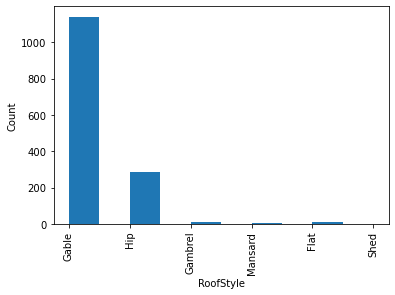

RoofMatl


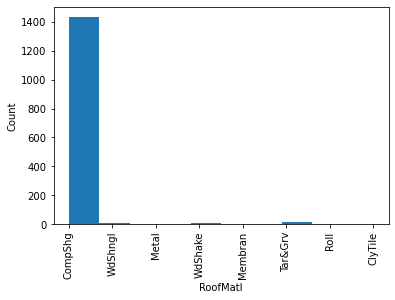

Exterior1st


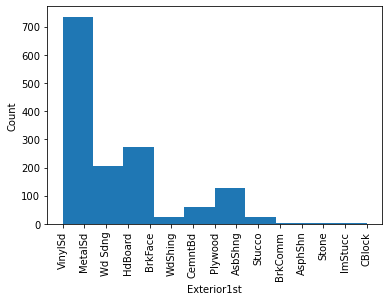

Exterior2nd


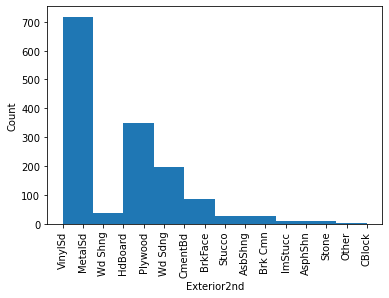

MasVnrType


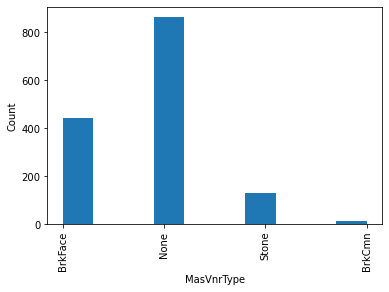

MasVnrArea


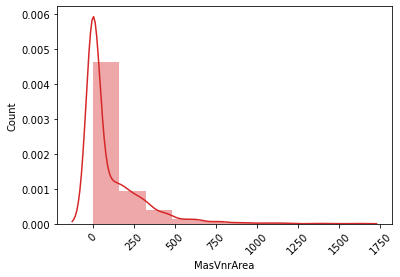

ExterQual


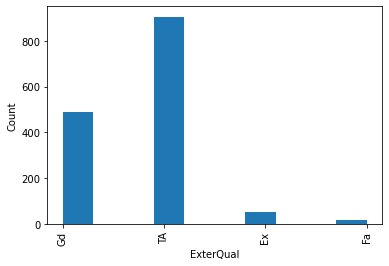

ExterCond


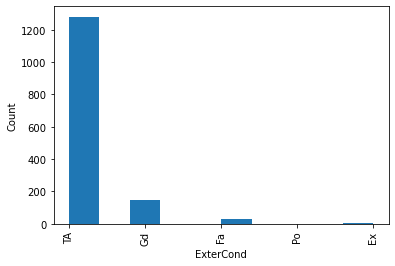

Foundation


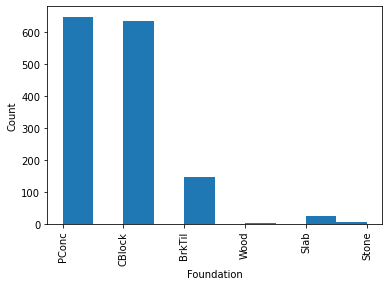

BsmtQual


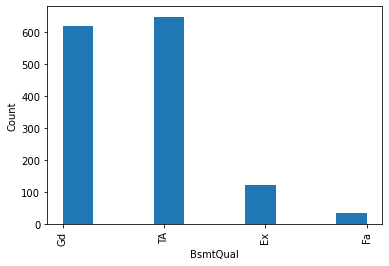

BsmtCond


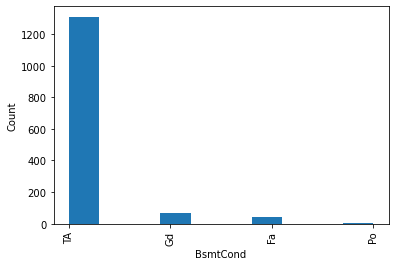

BsmtExposure


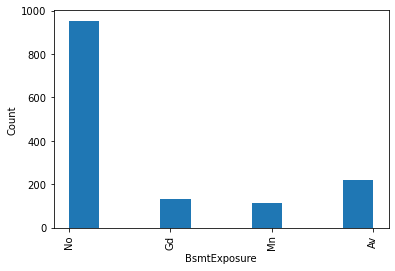

BsmtFinType1


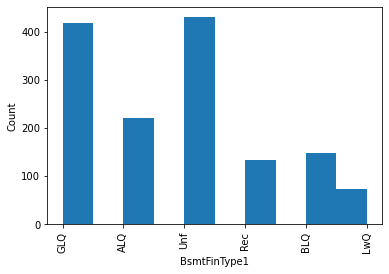

BsmtFinSF1


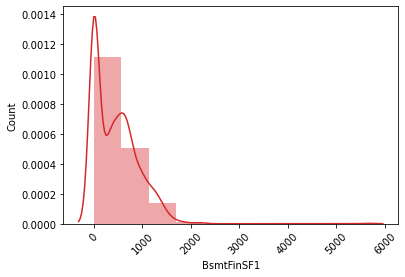

BsmtFinType2


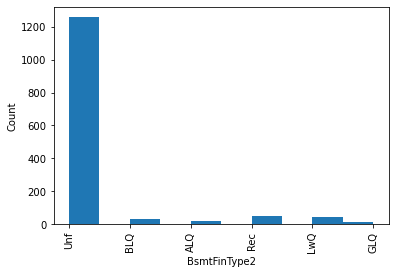

BsmtFinSF2


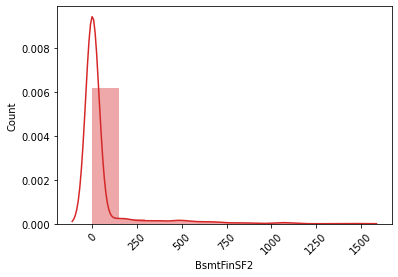

BsmtUnfSF


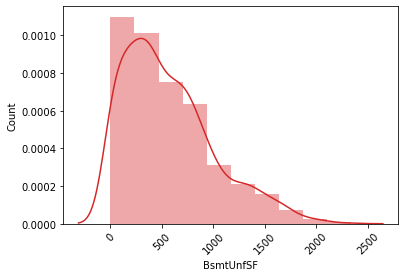

TotalBsmtSF


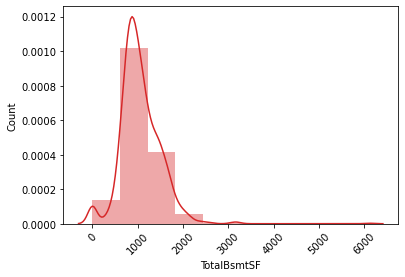

Heating


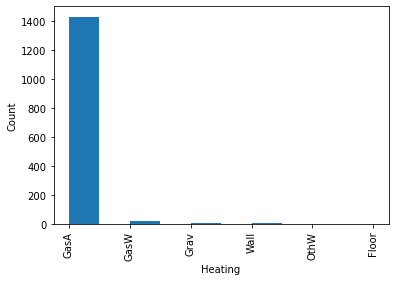

HeatingQC


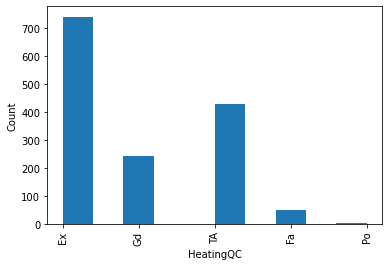

CentralAir


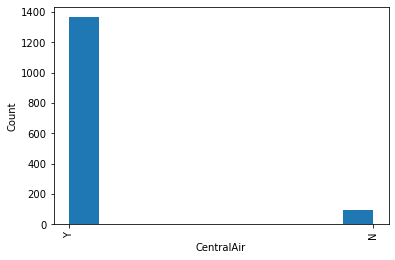

Electrical


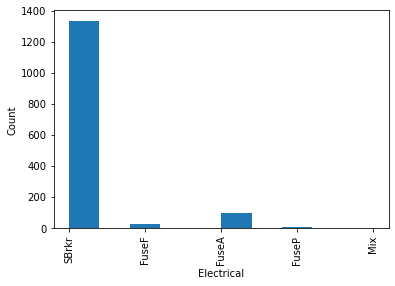

1stFlrSF


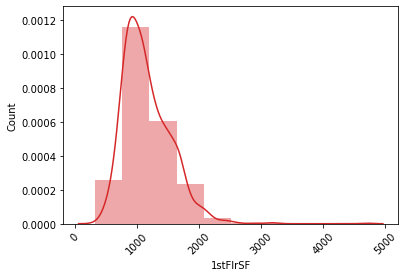

2ndFlrSF


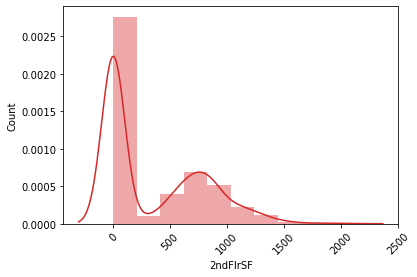

LowQualFinSF


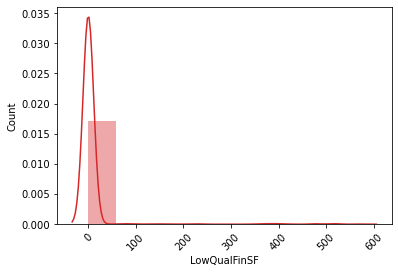

GrLivArea


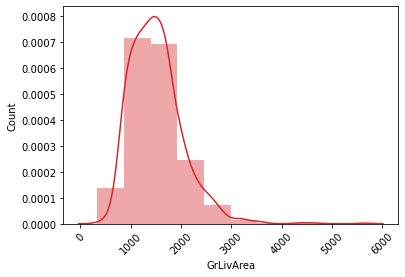

BsmtFullBath


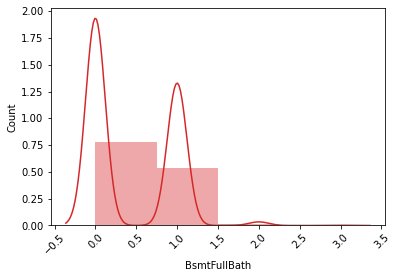

BsmtHalfBath


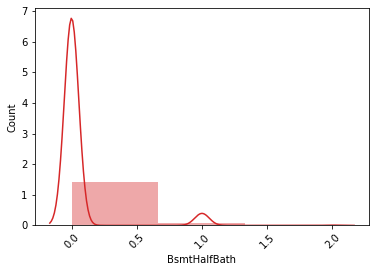

FullBath


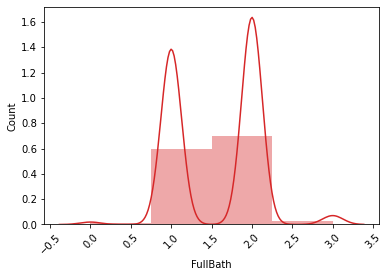

HalfBath


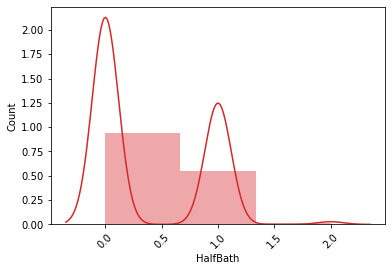

BedroomAbvGr


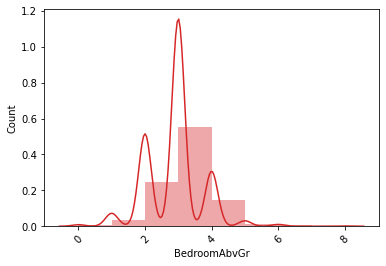

KitchenAbvGr


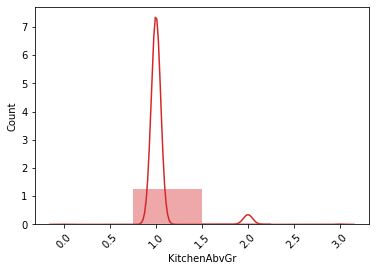

KitchenQual


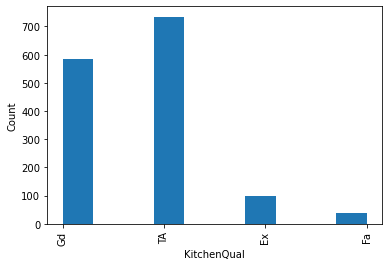

TotRmsAbvGrd


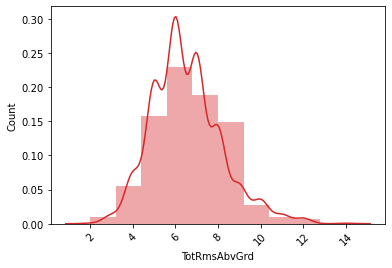

Functional


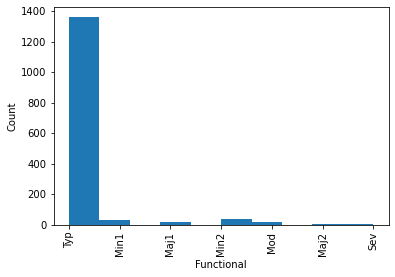

Fireplaces


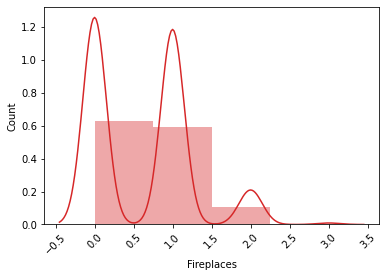

FireplaceQu


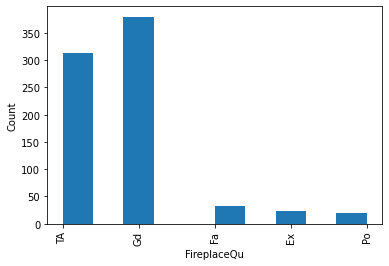

GarageType


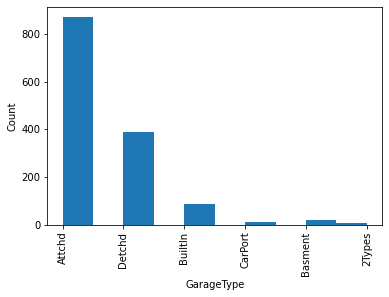

GarageYrBlt


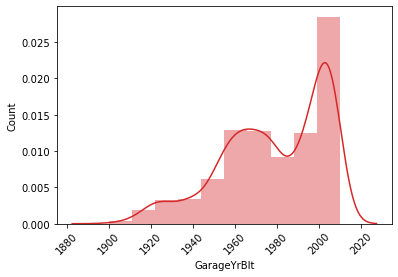

GarageFinish


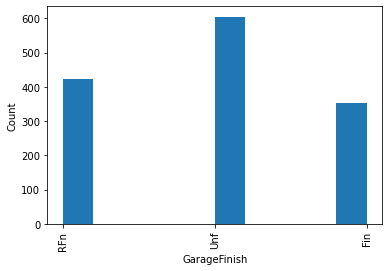

GarageCars


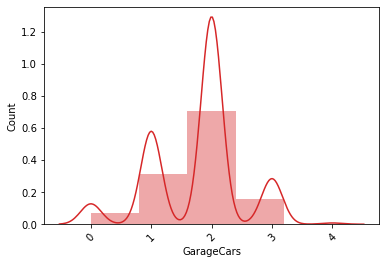

GarageArea


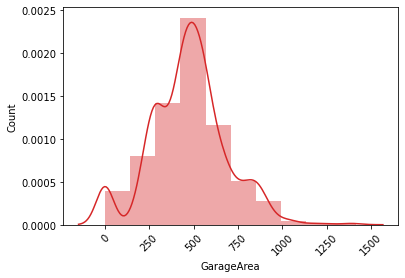

GarageQual


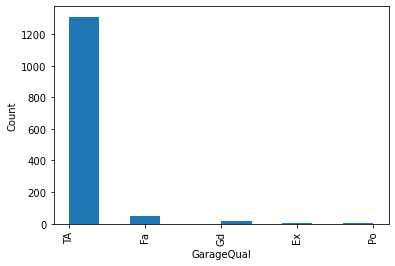

GarageCond


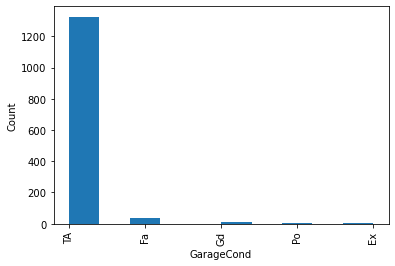

PavedDrive


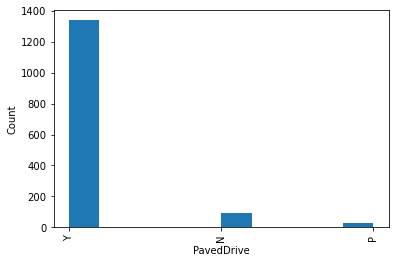

WoodDeckSF


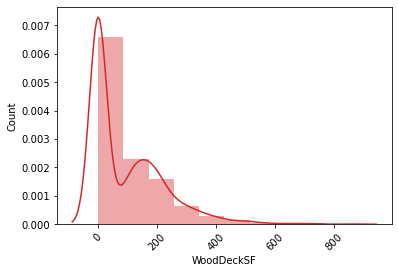

OpenPorchSF


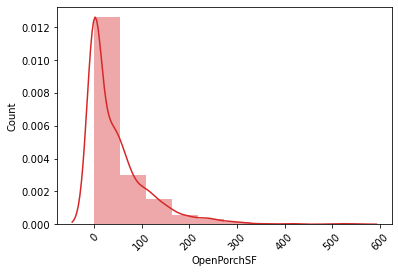

EnclosedPorch


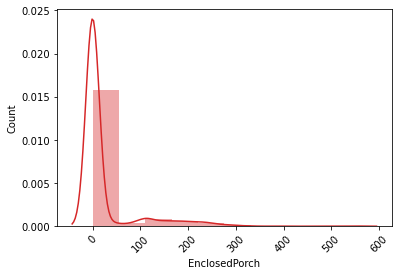

3SsnPorch


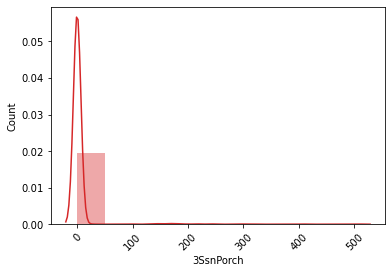

ScreenPorch


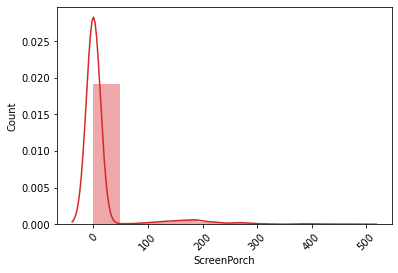

PoolArea


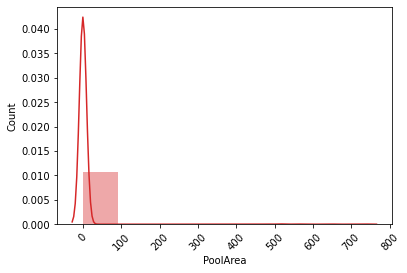

PoolQC


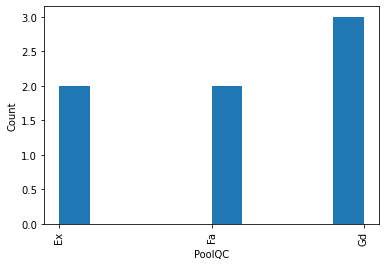

Fence


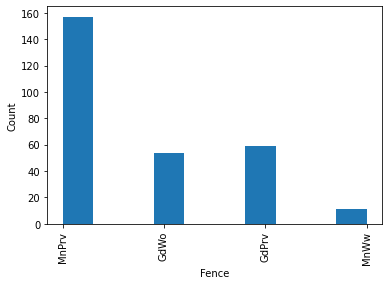

MiscFeature


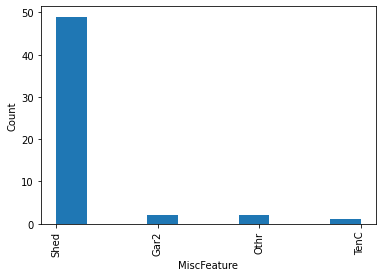

MiscVal


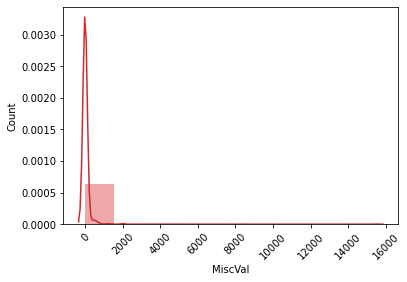

MoSold


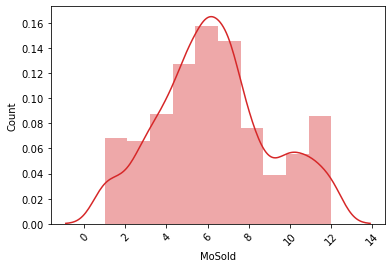

YrSold


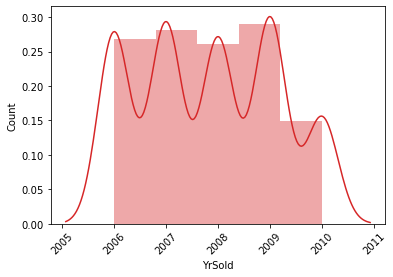

SaleType


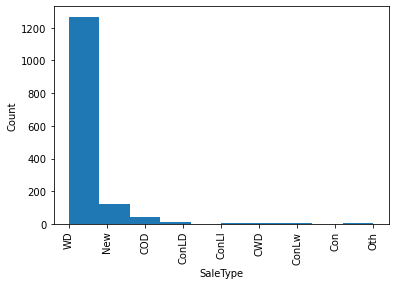

SaleCondition


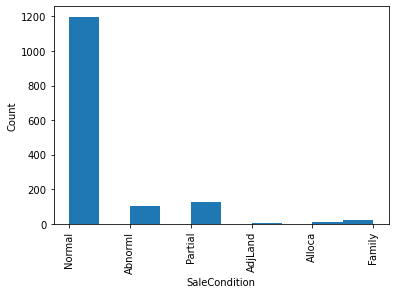

In [23]:
UnivariatePlotSummary(df_train, ['Id','SalePrice']).density_plot()

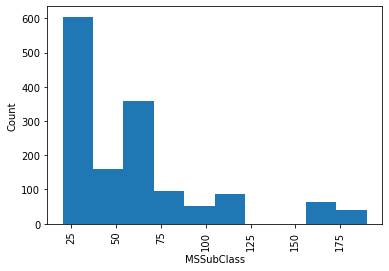

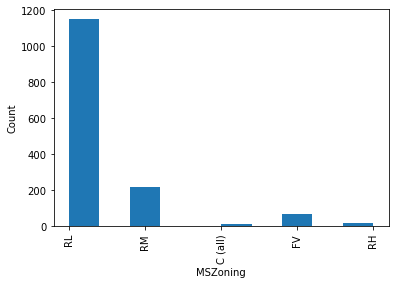

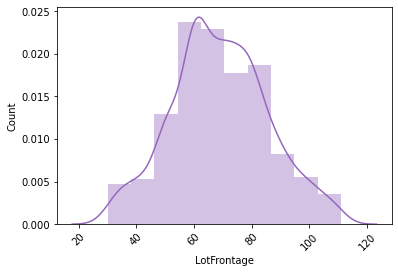

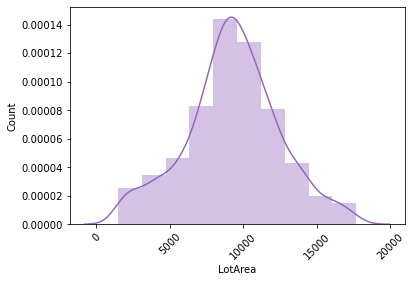

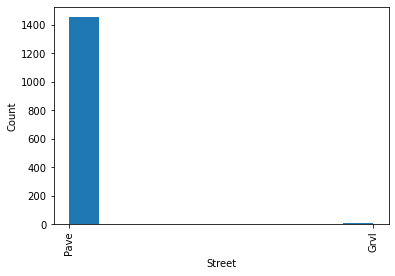

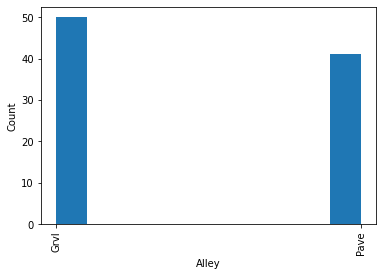

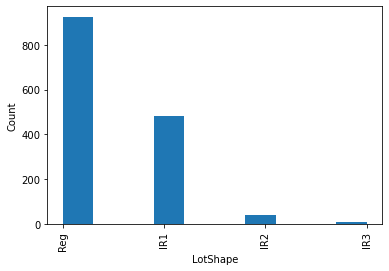

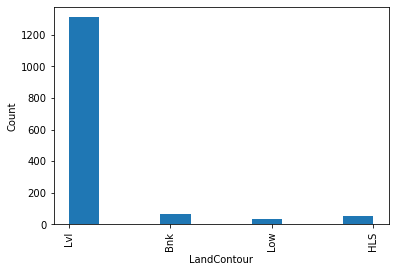

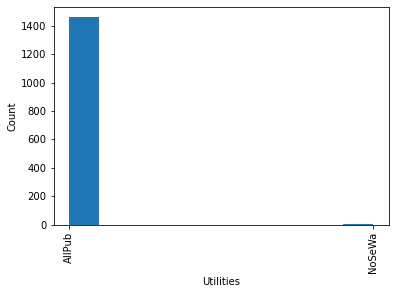

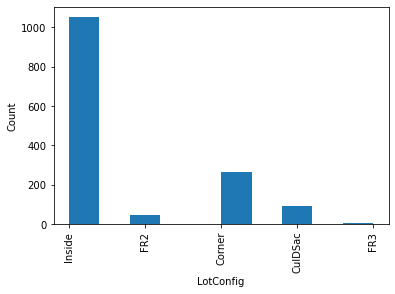

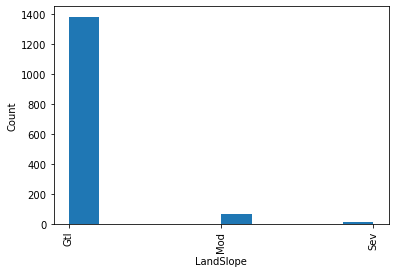

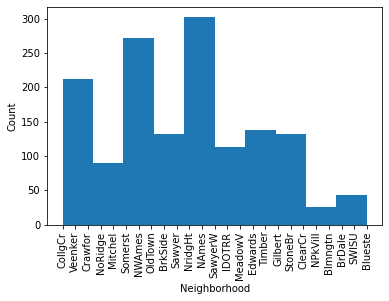

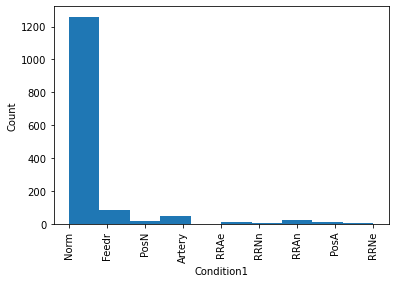

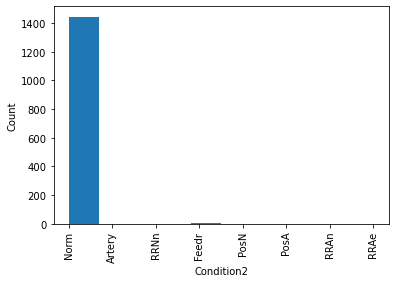

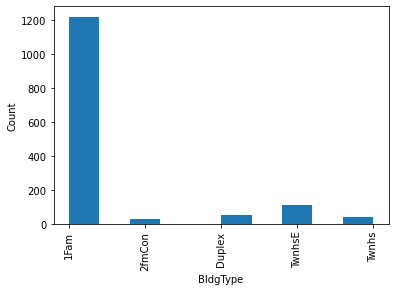

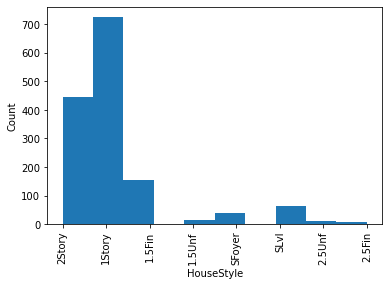

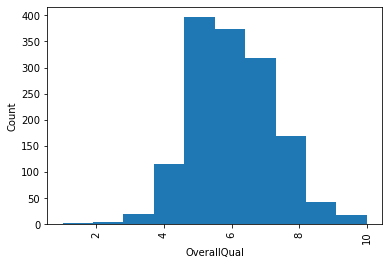

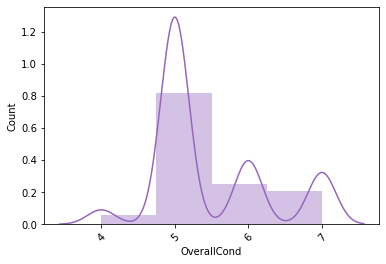

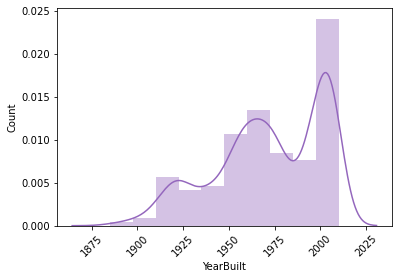

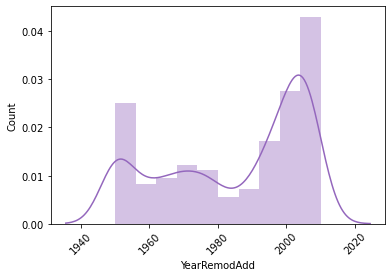

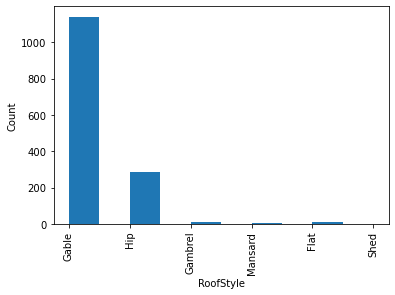

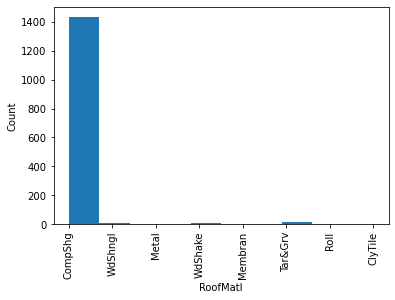

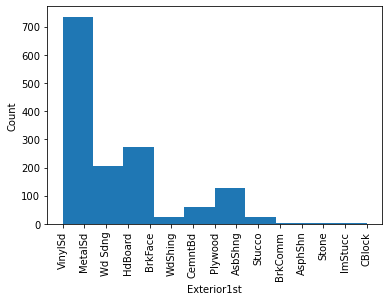

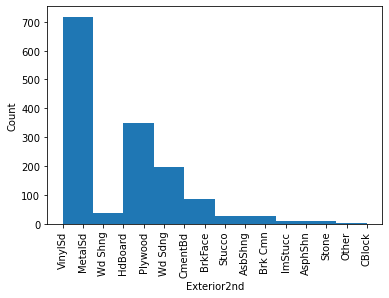

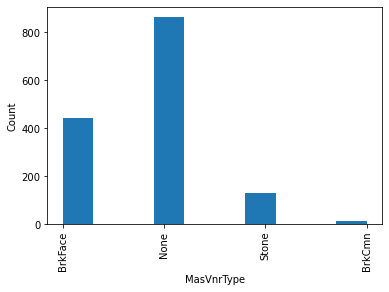

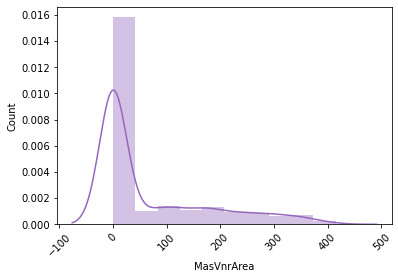

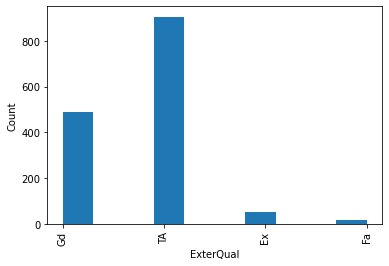

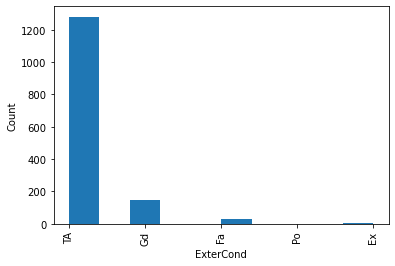

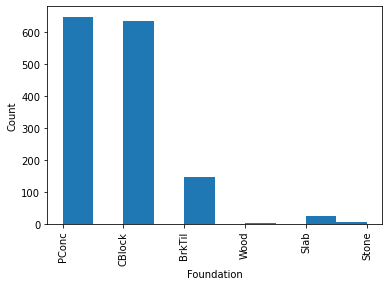

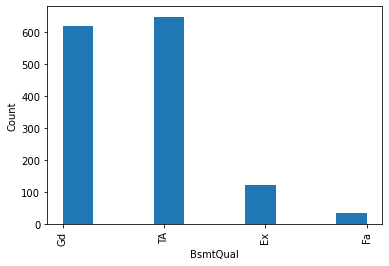

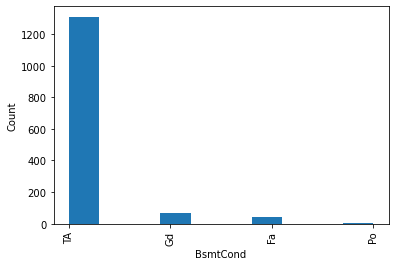

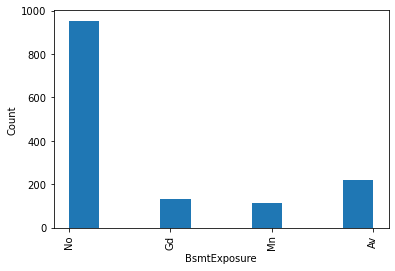

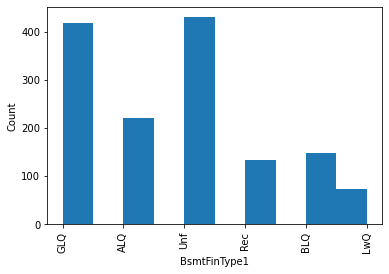

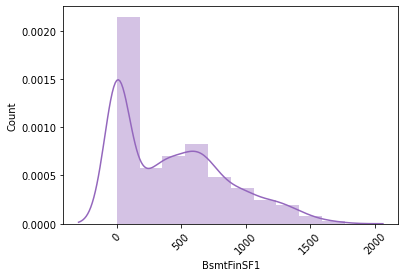

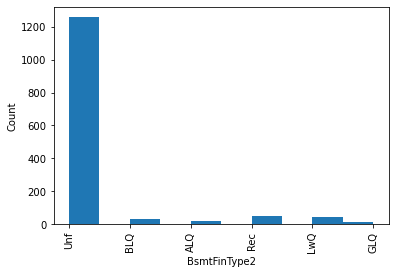

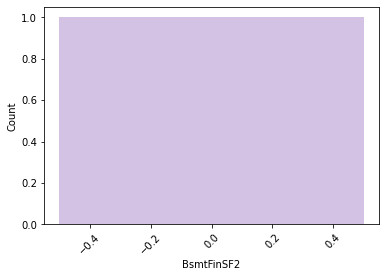

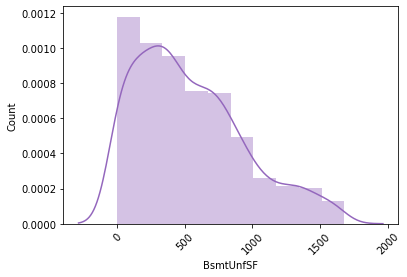

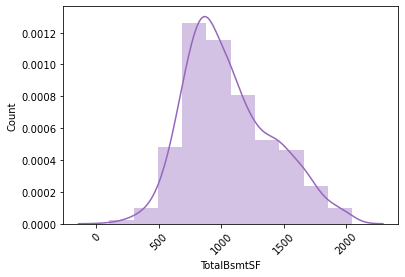

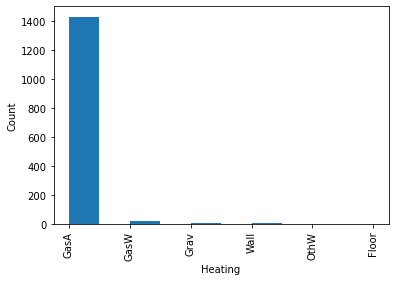

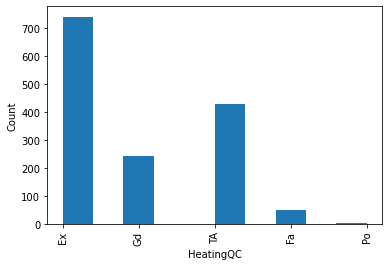

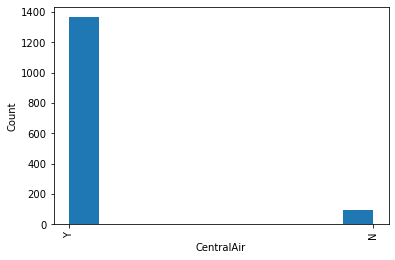

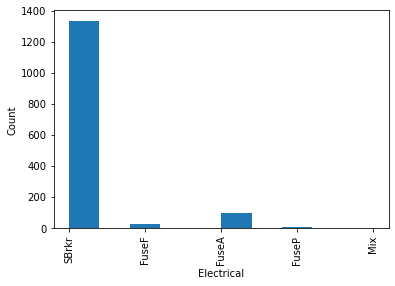

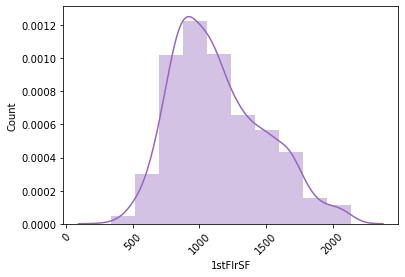

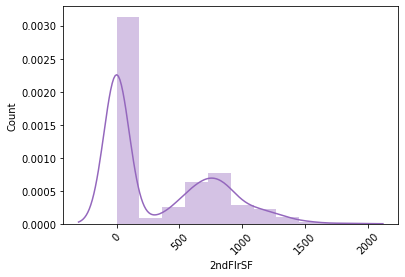

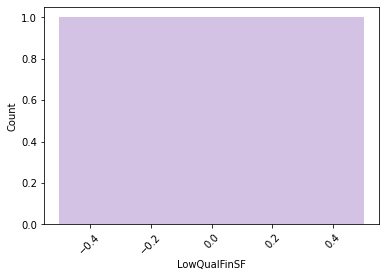

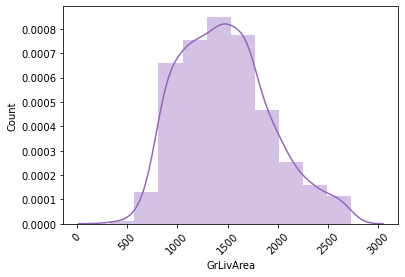

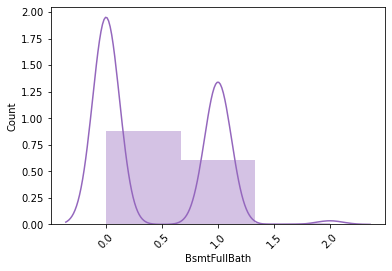

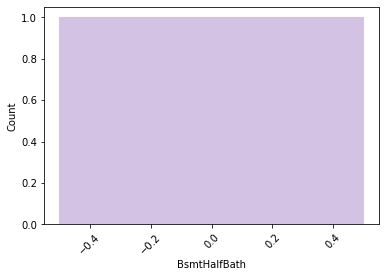

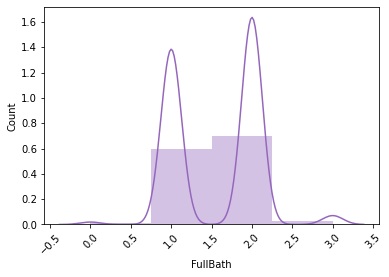

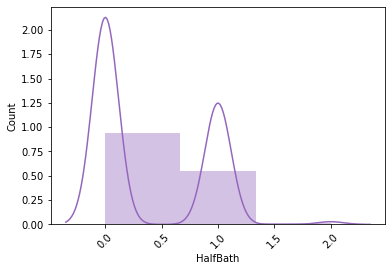

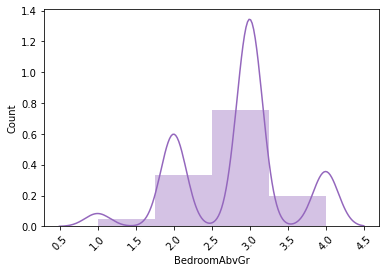

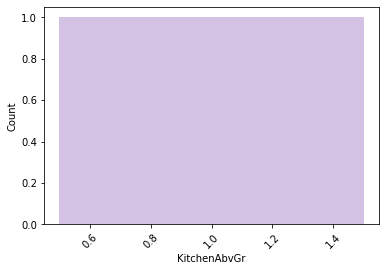

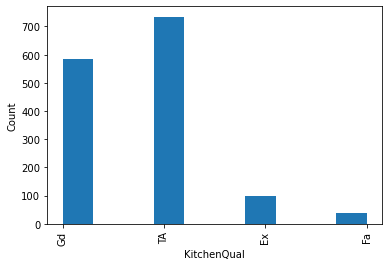

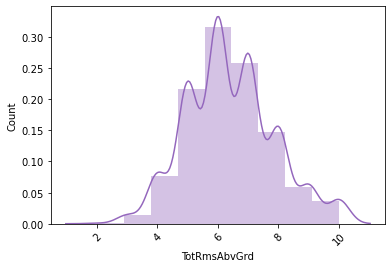

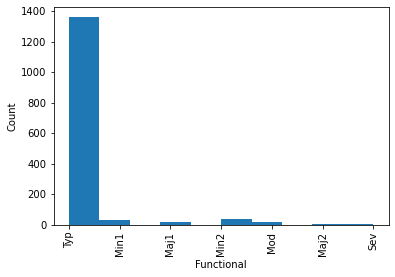

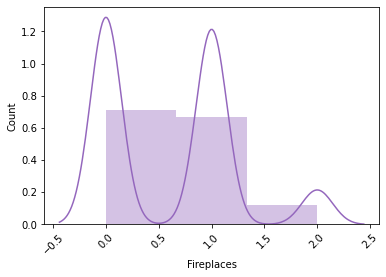

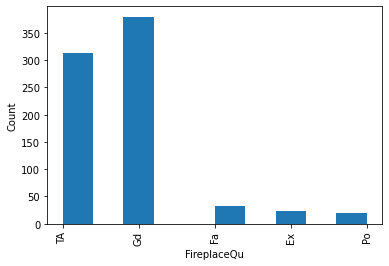

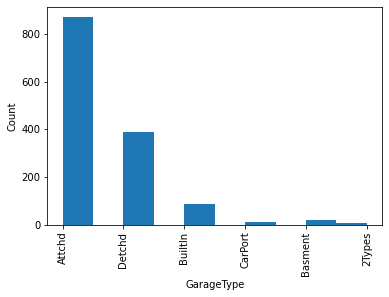

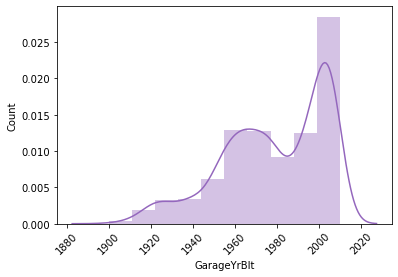

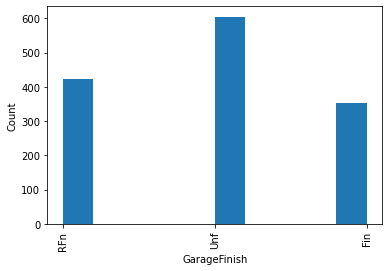

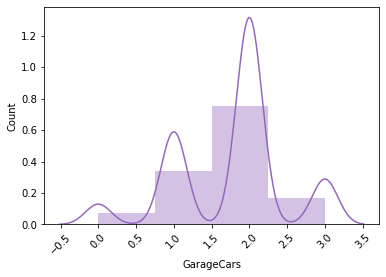

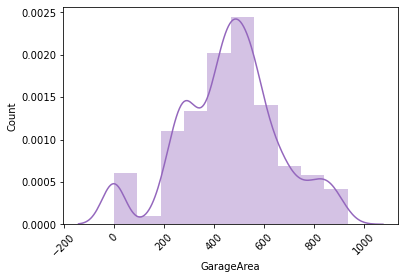

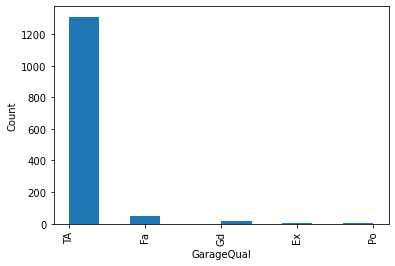

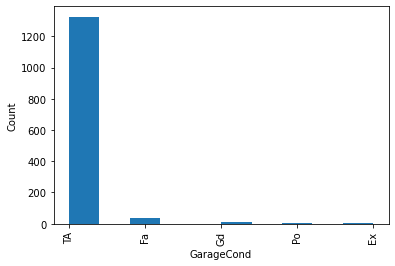

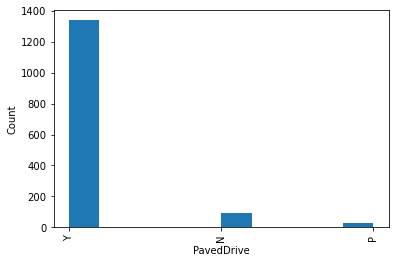

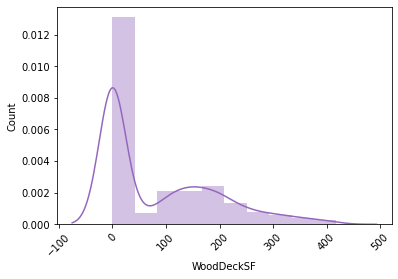

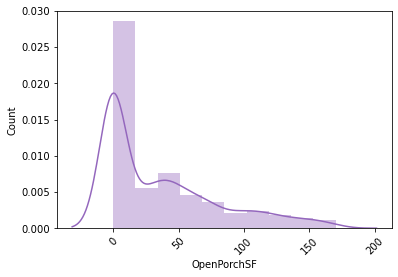

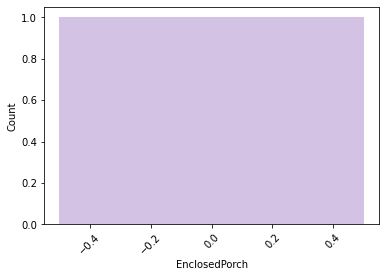

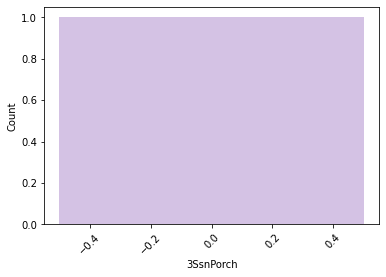

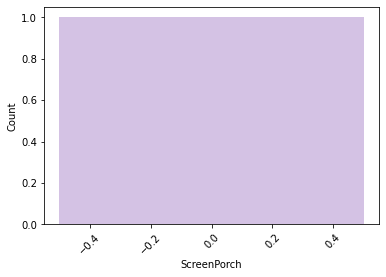

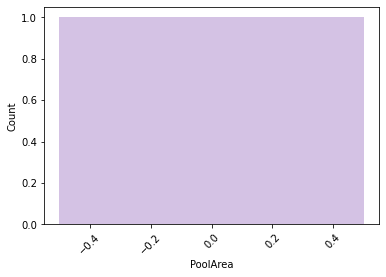

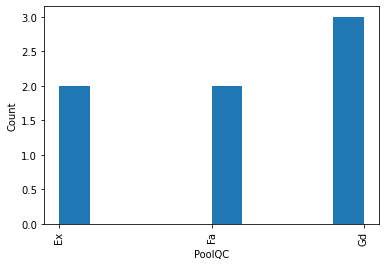

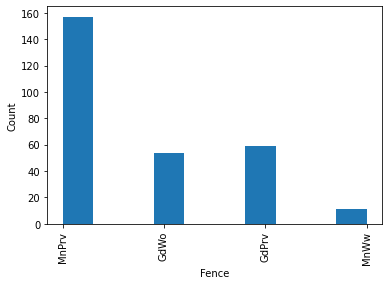

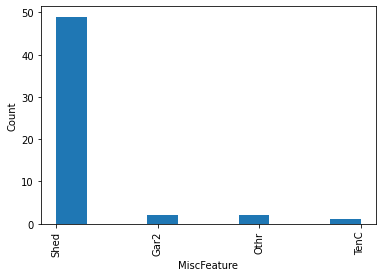

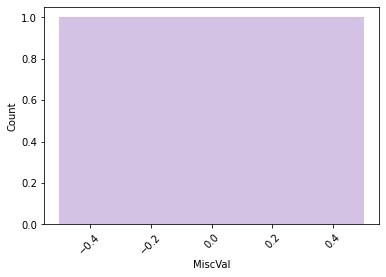

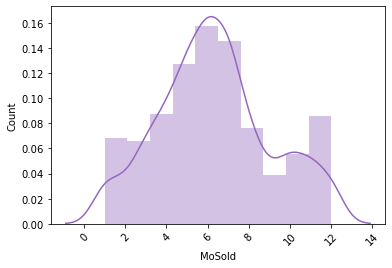

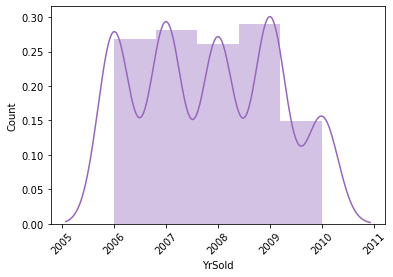

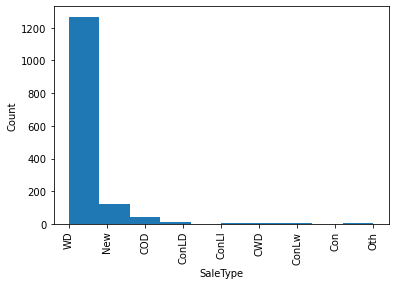

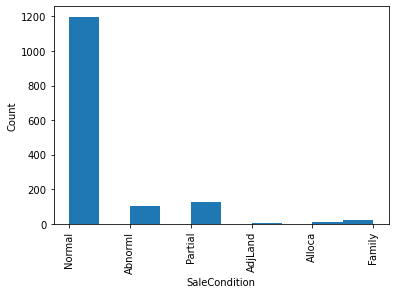

In [24]:
UnivariatePlotSummary(df_train, ['Id','SalePrice']).non_outlier_density_plot()

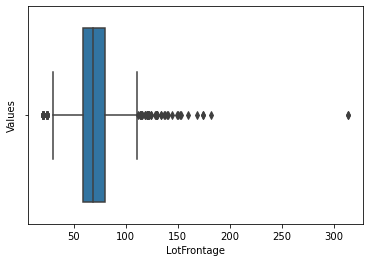

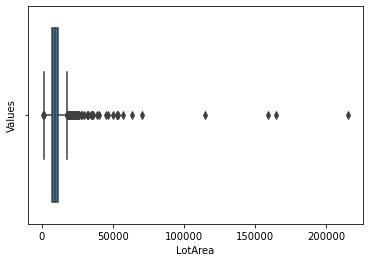

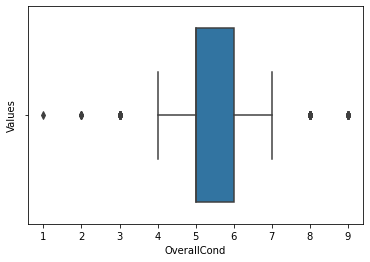

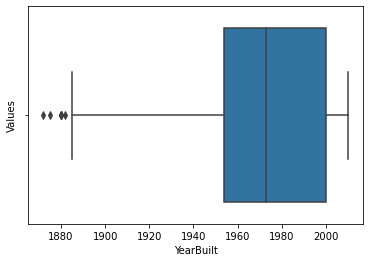

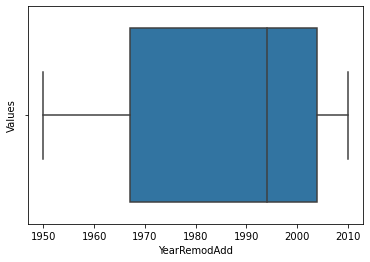

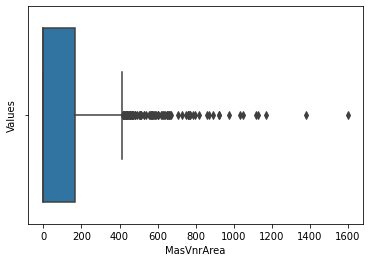

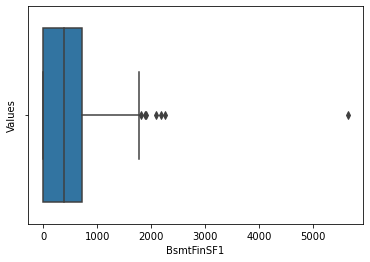

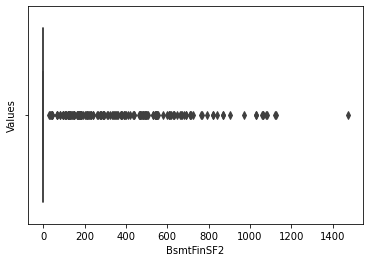

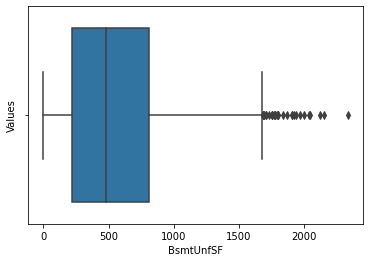

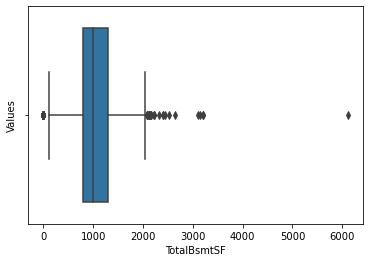

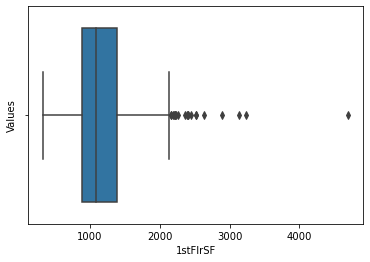

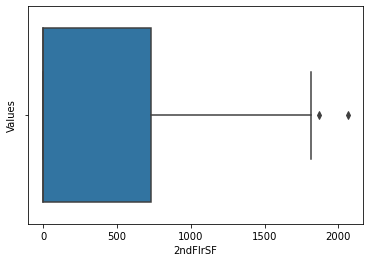

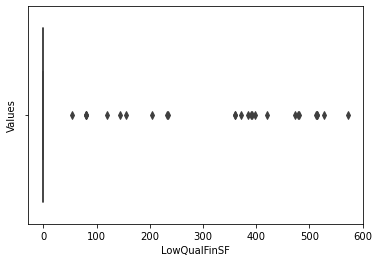

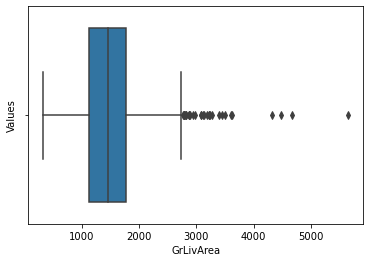

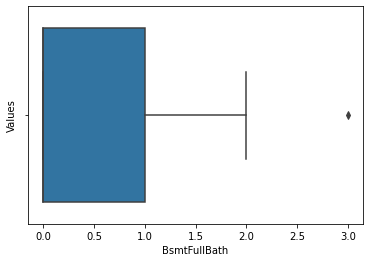

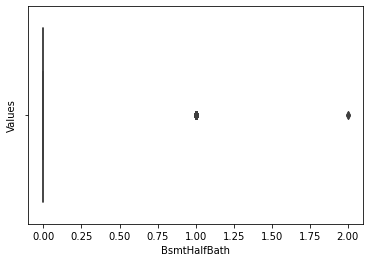

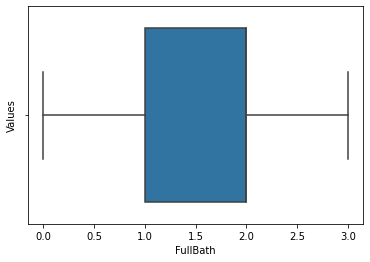

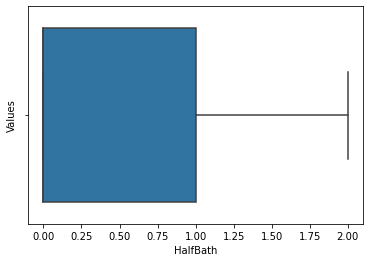

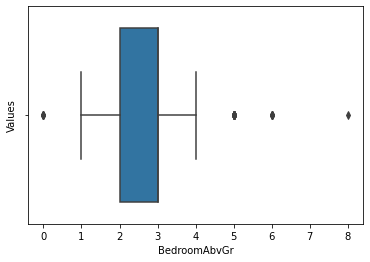

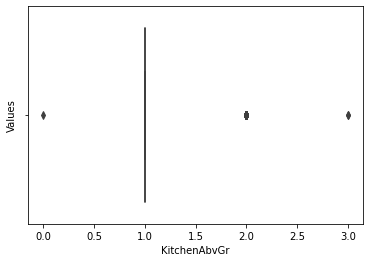

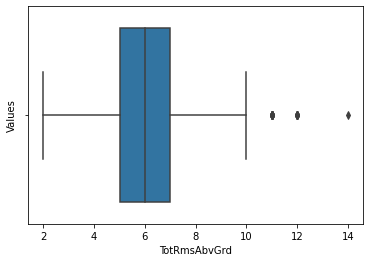

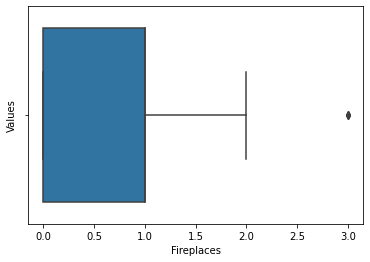

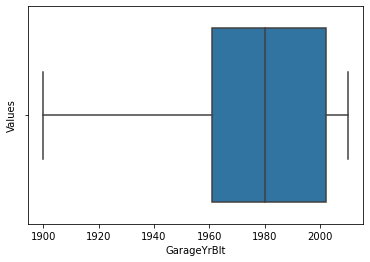

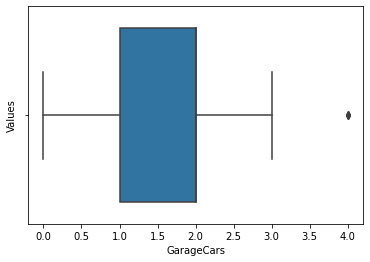

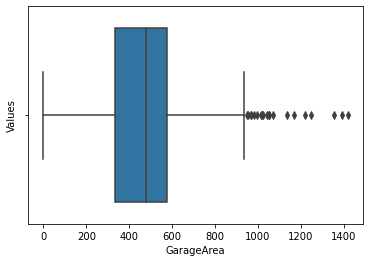

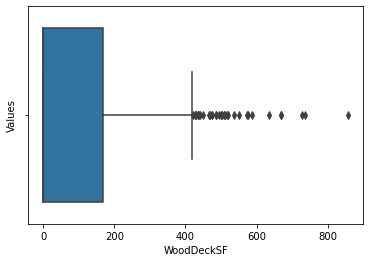

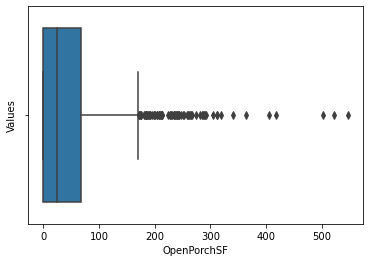

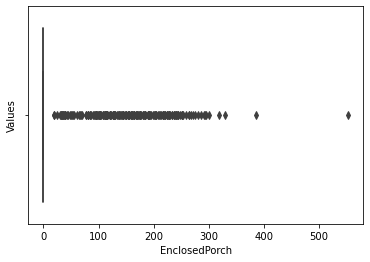

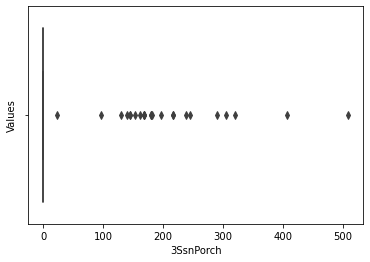

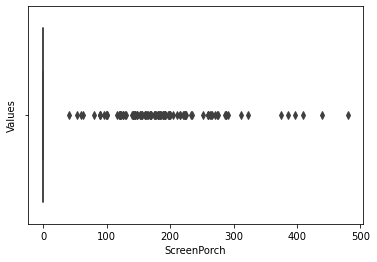

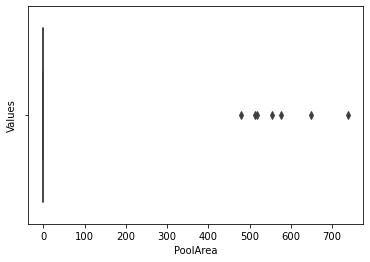

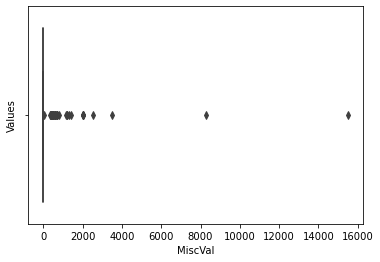

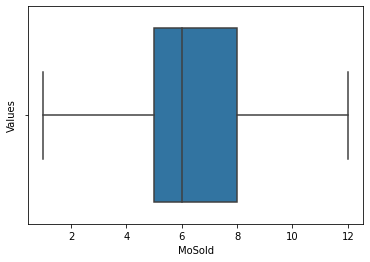

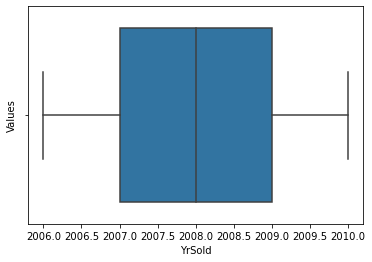

In [25]:
UnivariatePlotSummary(df_train, ['Id','SalePrice']).box_plot()

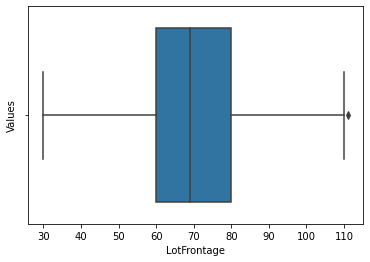

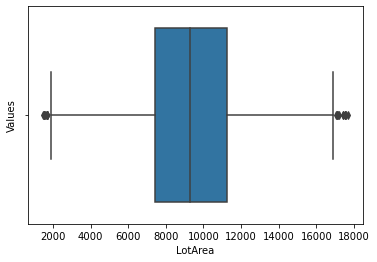

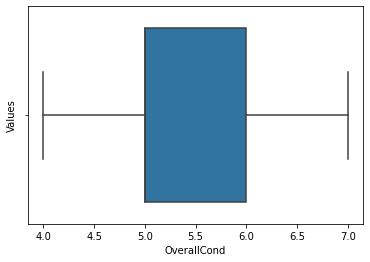

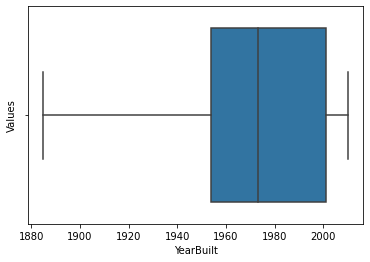

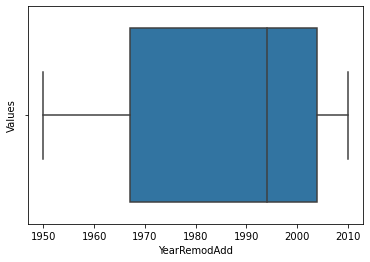

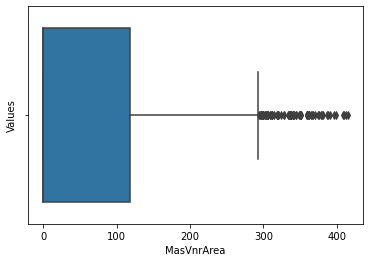

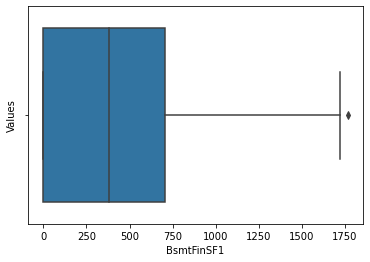

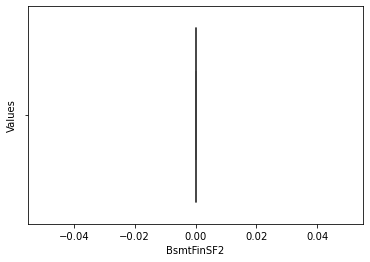

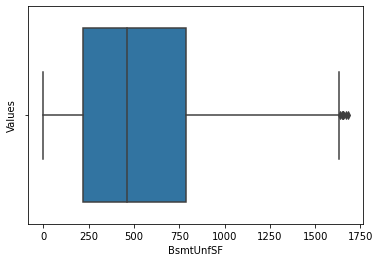

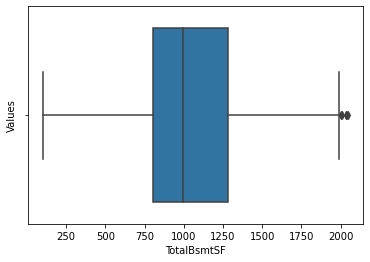

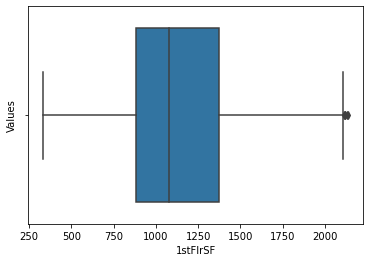

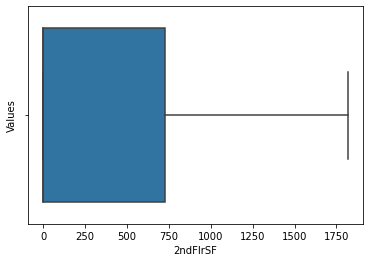

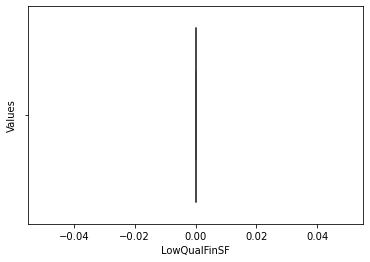

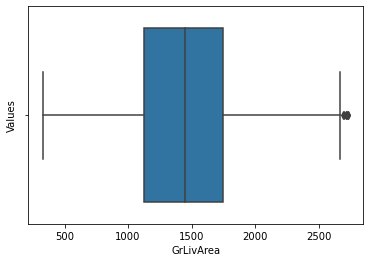

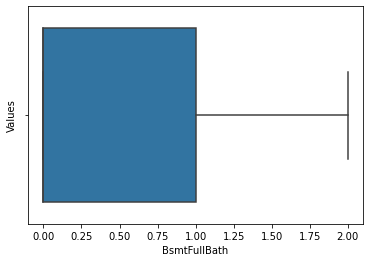

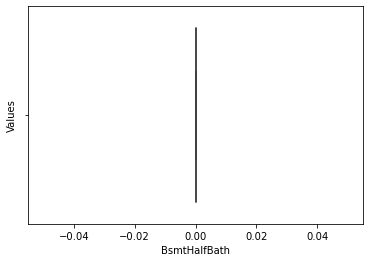

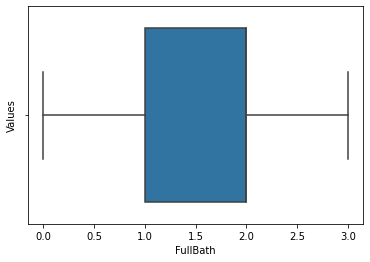

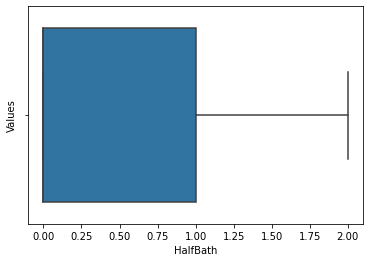

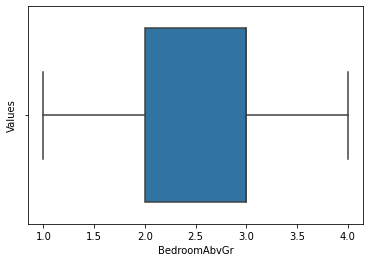

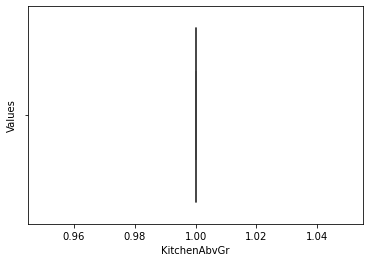

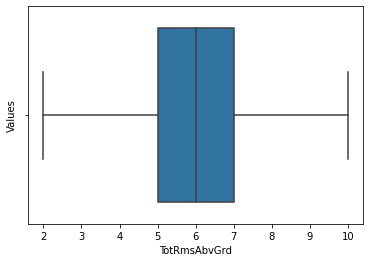

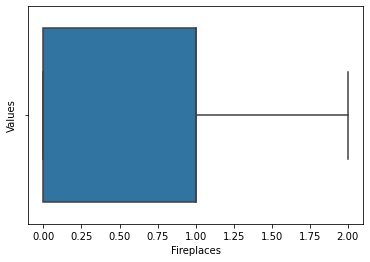

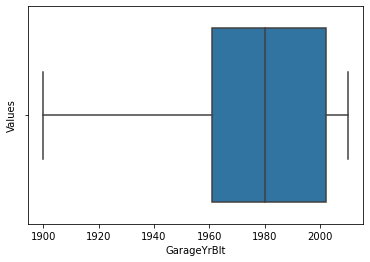

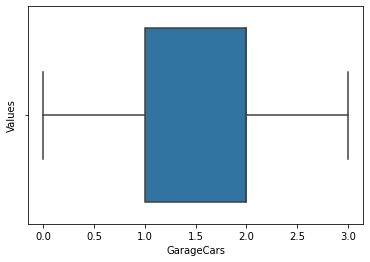

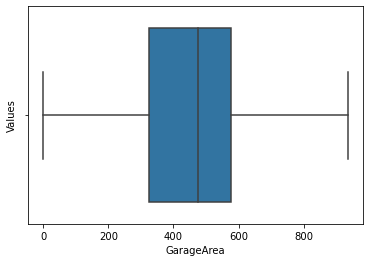

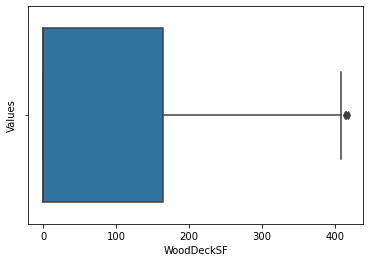

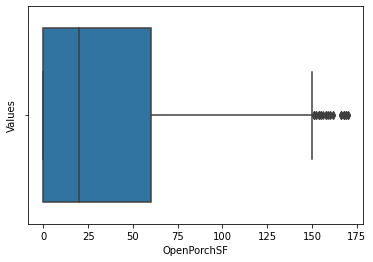

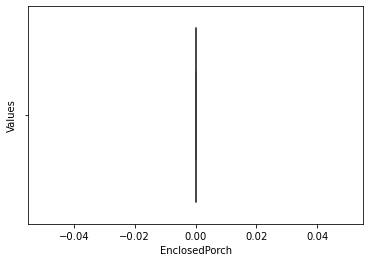

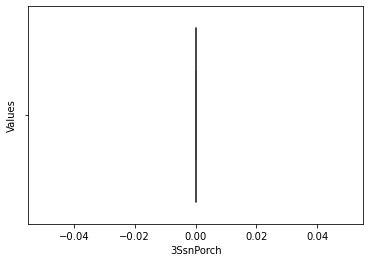

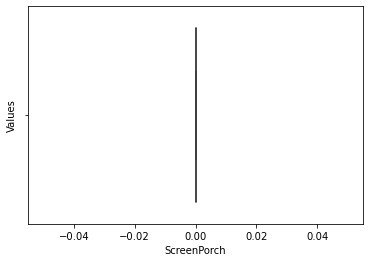

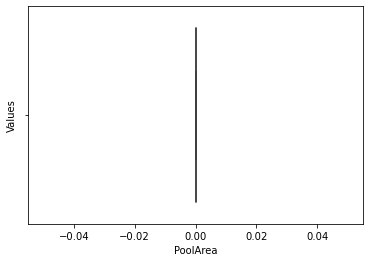

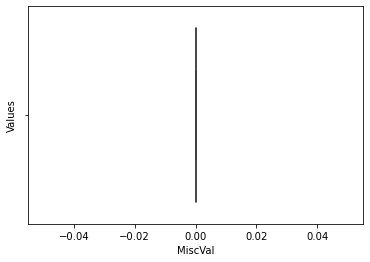

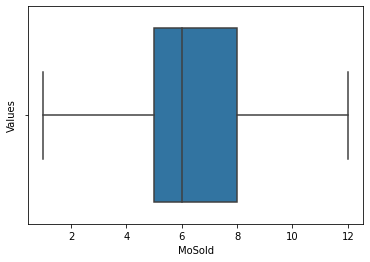

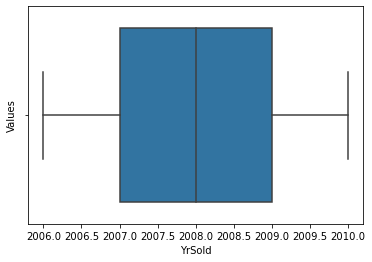

In [26]:
UnivariatePlotSummary(df_train, ['Id','SalePrice']).non_outlier_box_plot()

## How 'SalePrice' Going with Buddies?
<b>Bivariate Study</b>

### Numeric Variables

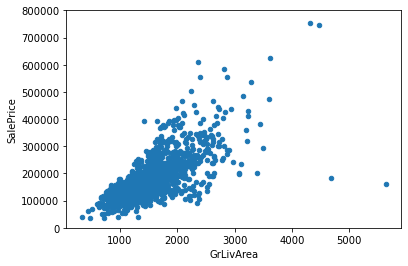

In [27]:
#scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

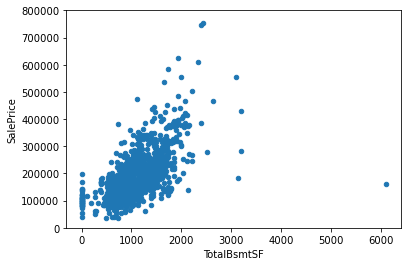

In [28]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

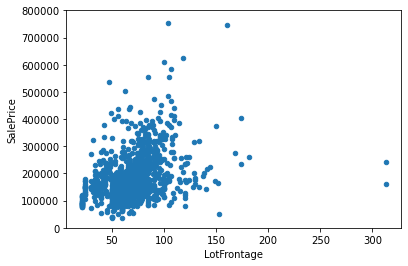

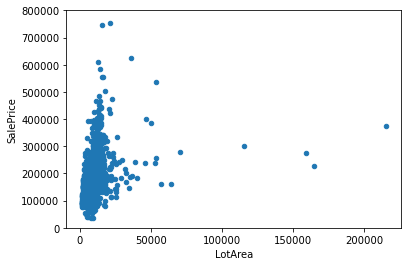

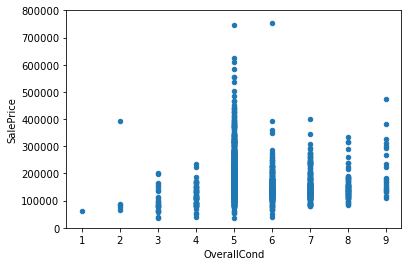

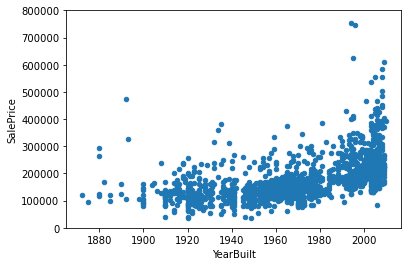

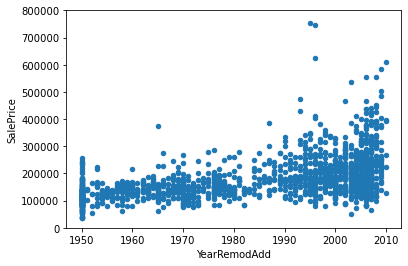

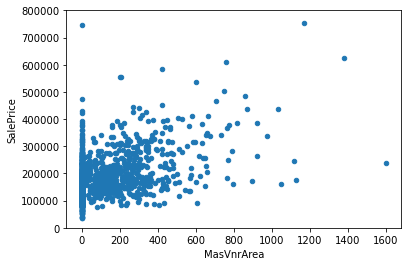

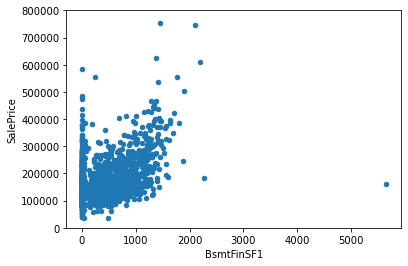

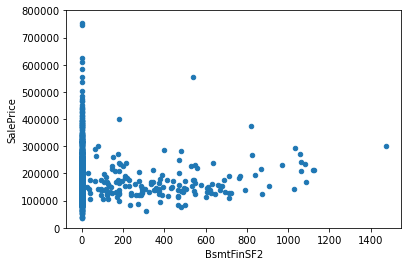

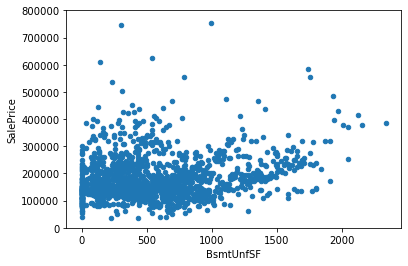

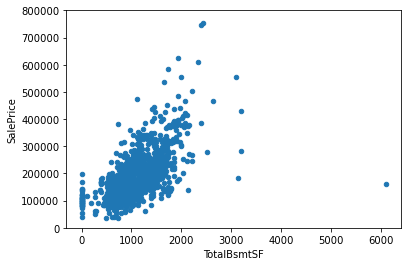

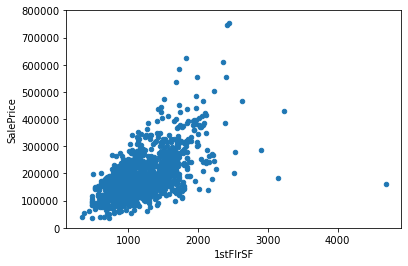

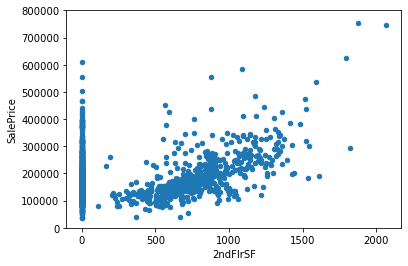

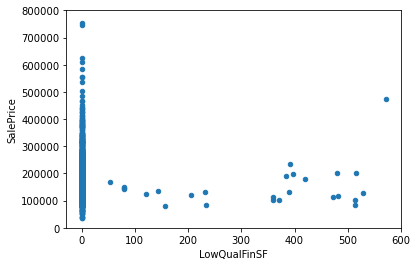

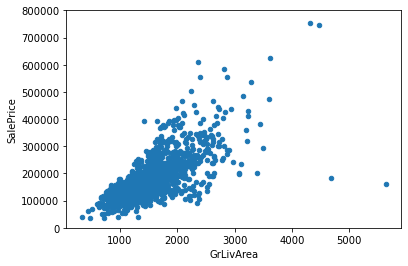

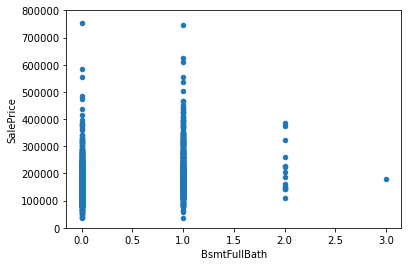

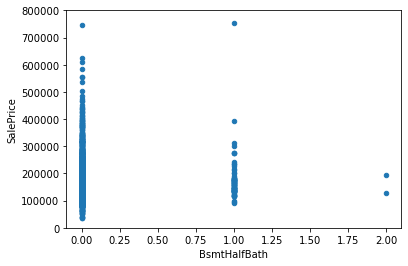

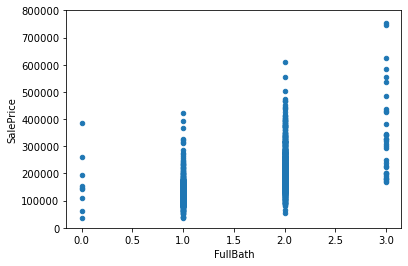

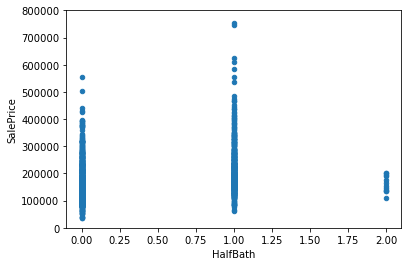

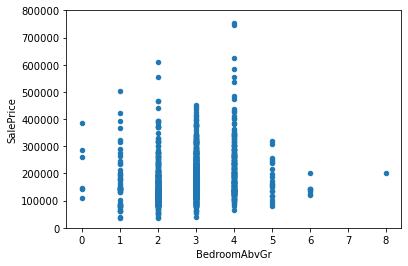

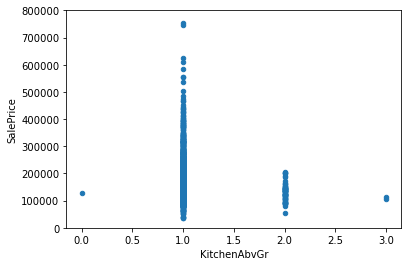

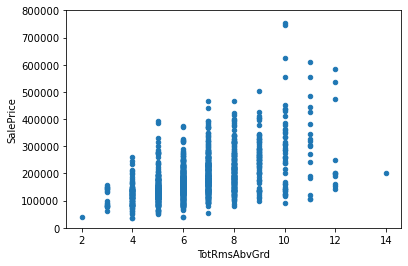

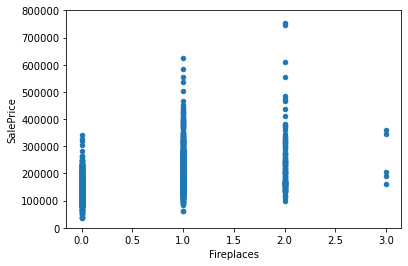

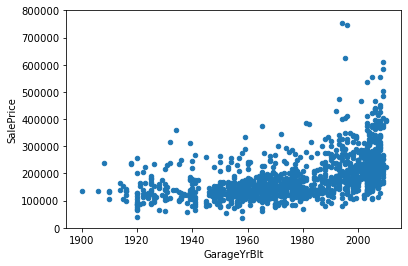

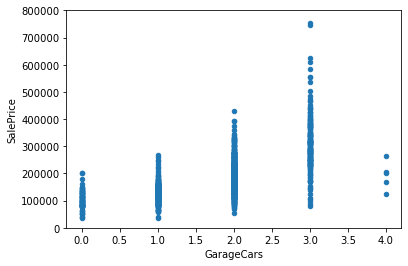

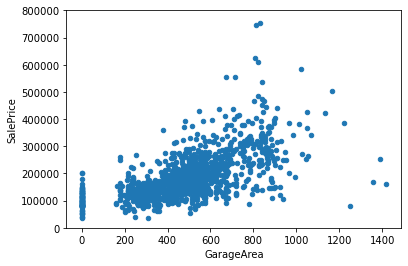

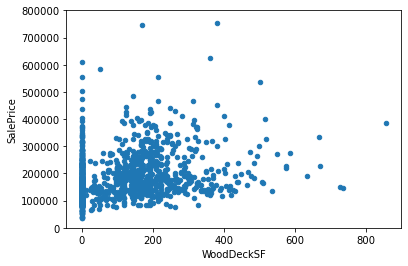

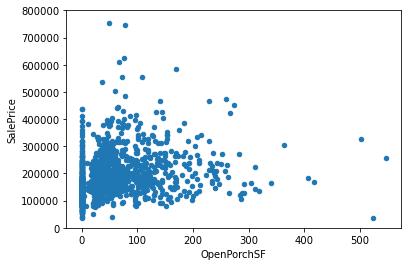

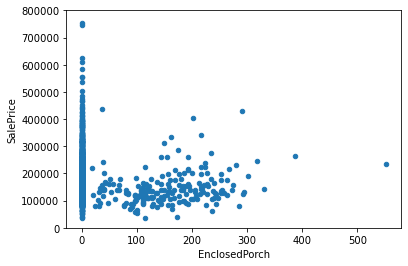

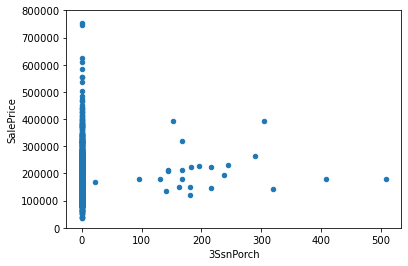

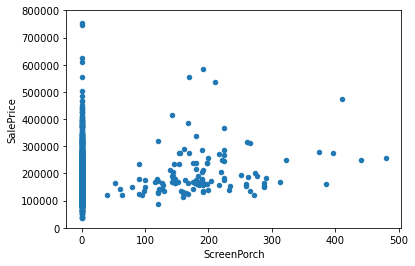

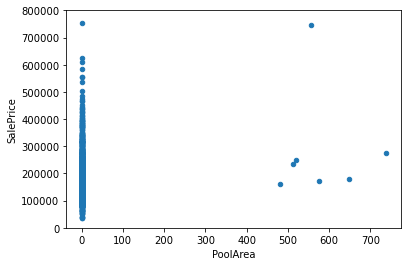

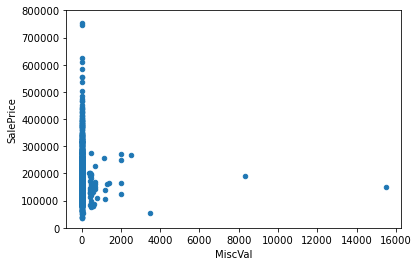

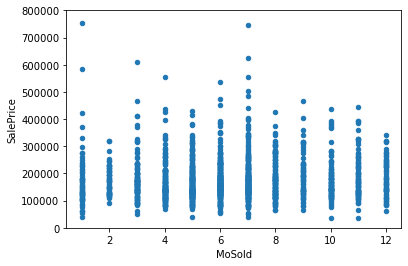

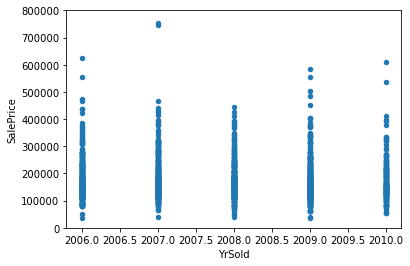

In [29]:
for var in df_train.drop(columns = id_cols)._get_numeric_data().columns:
    data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
    data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

### Categorical Variables

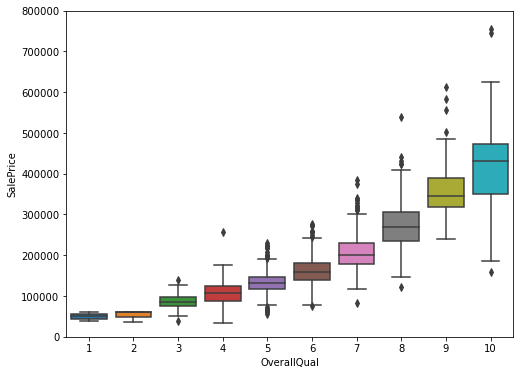

In [30]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

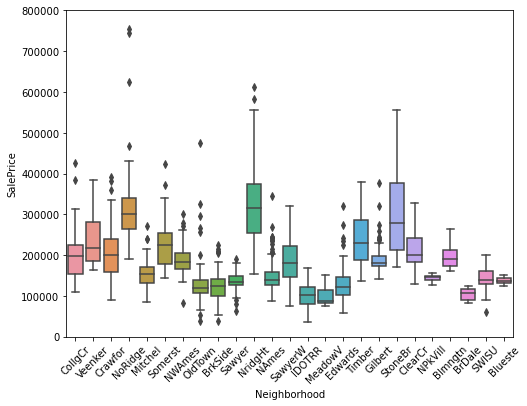

In [31]:
var = 'Neighborhood'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=45);

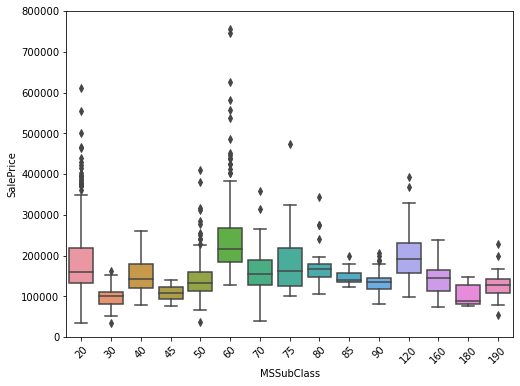

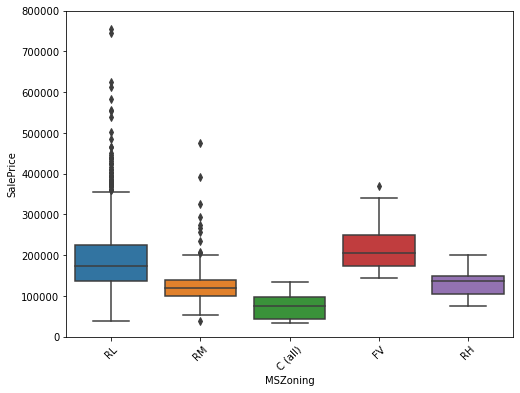

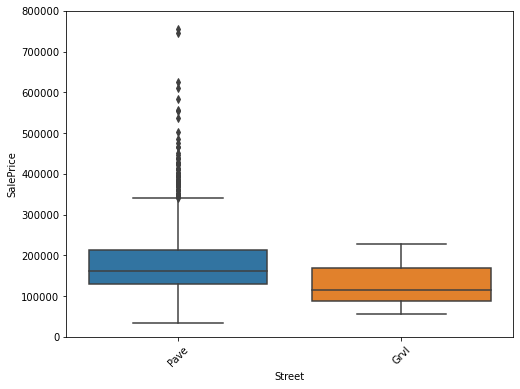

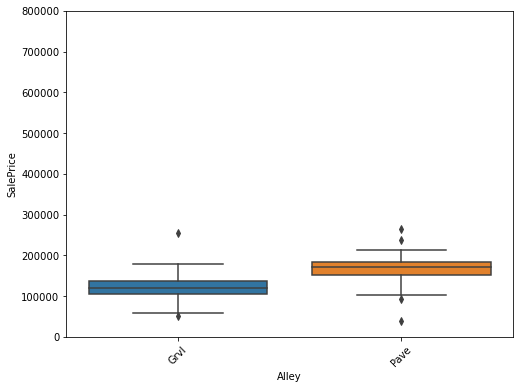

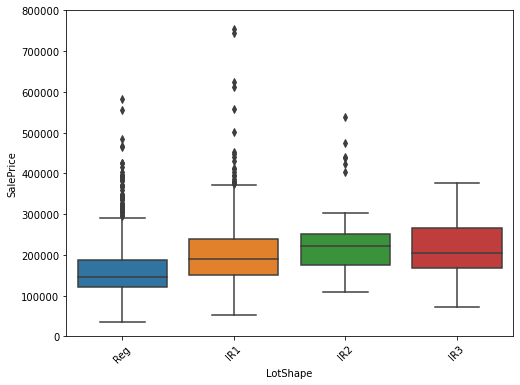

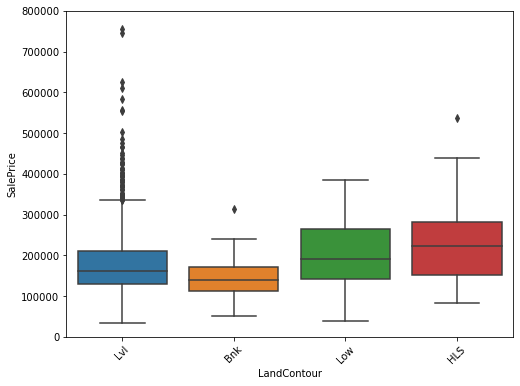

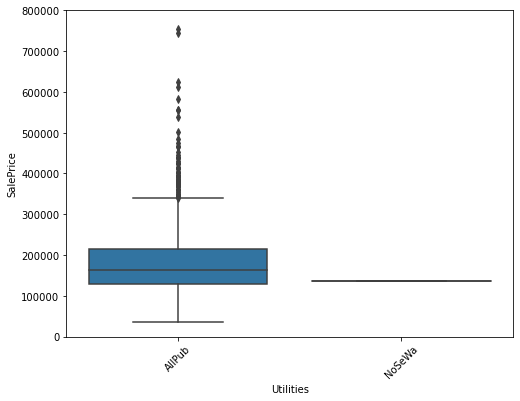

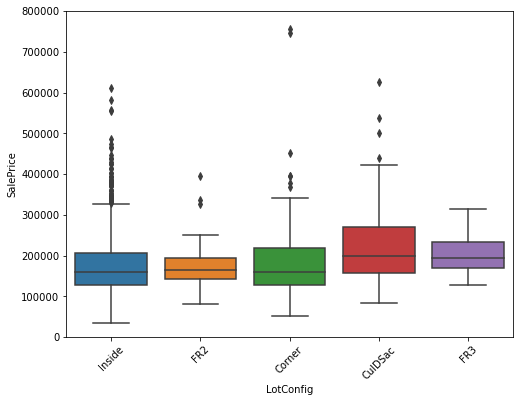

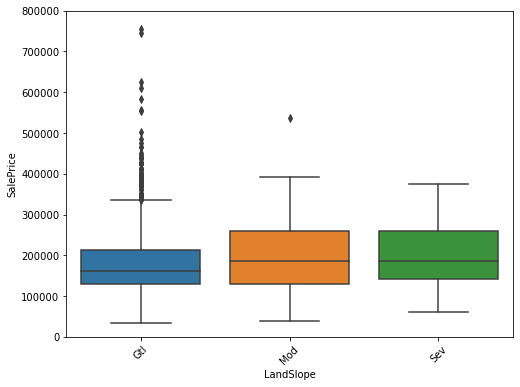

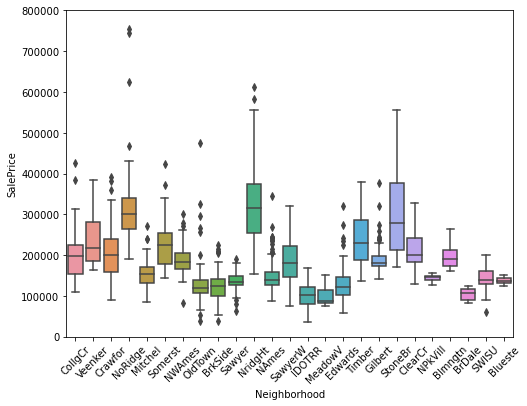

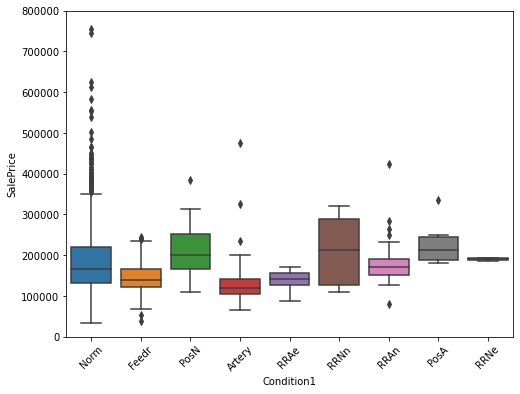

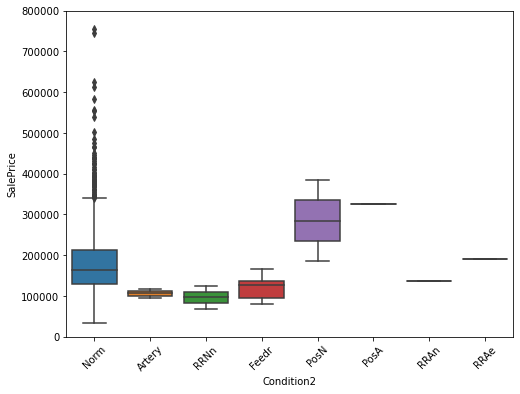

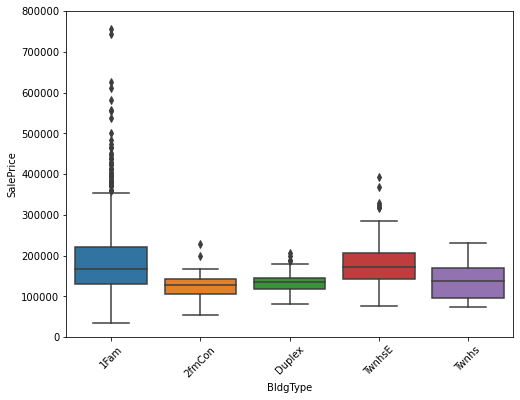

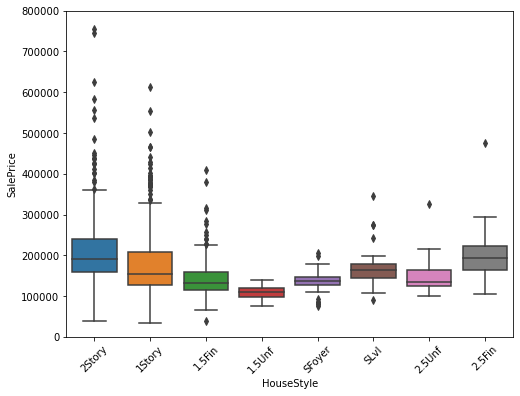

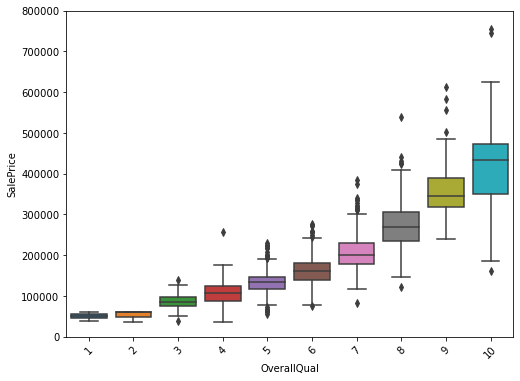

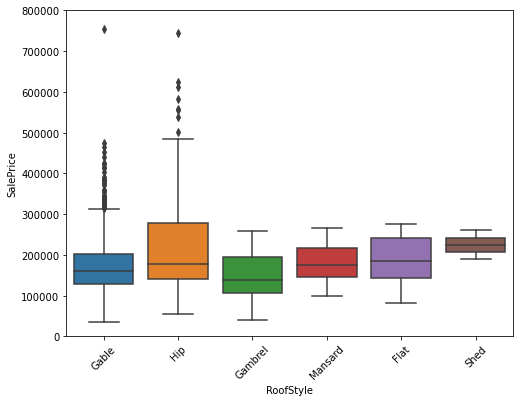

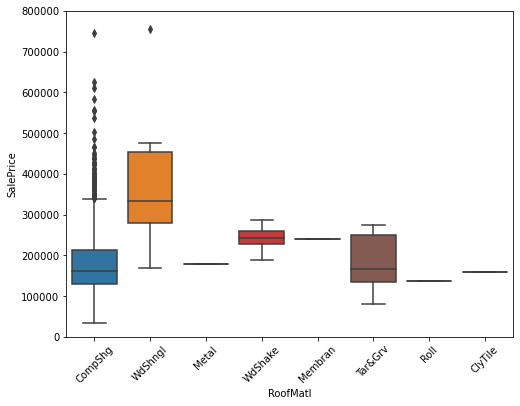

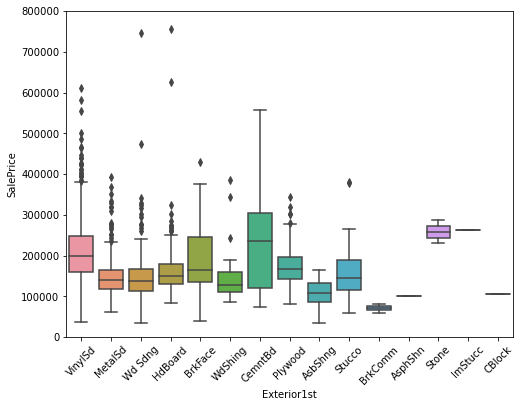

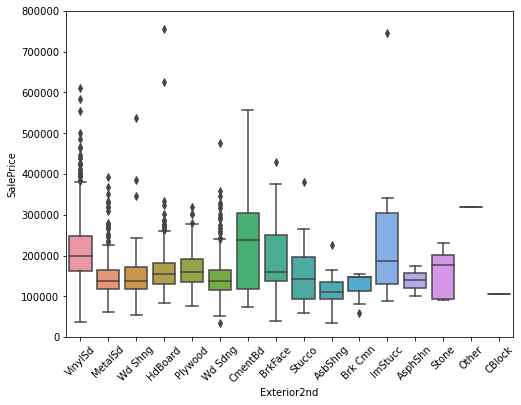

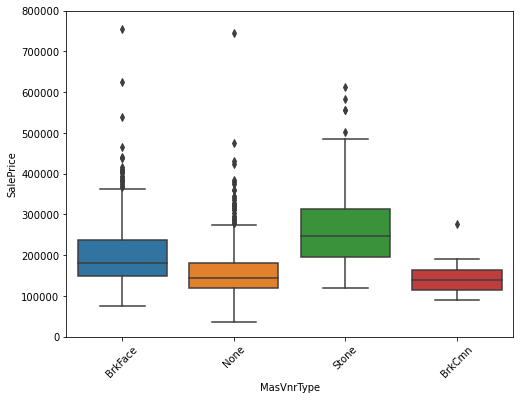

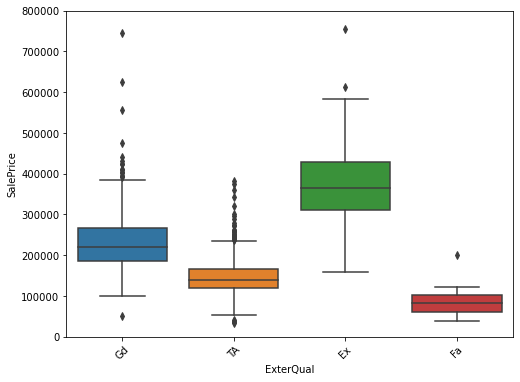

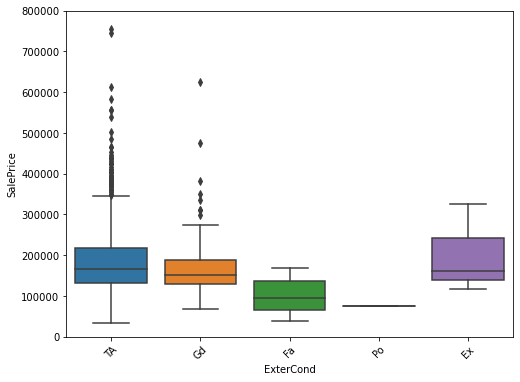

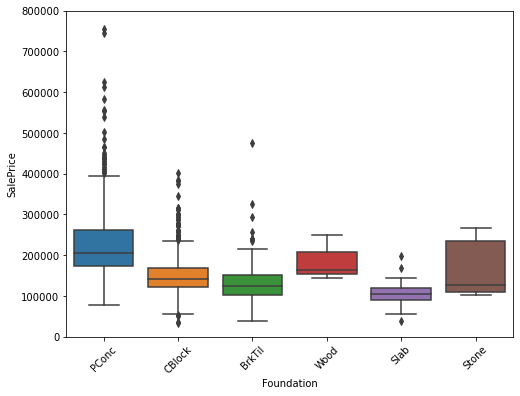

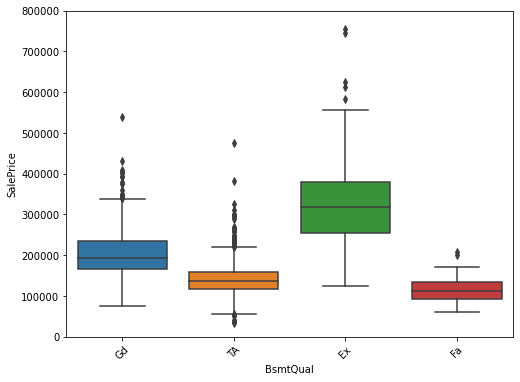

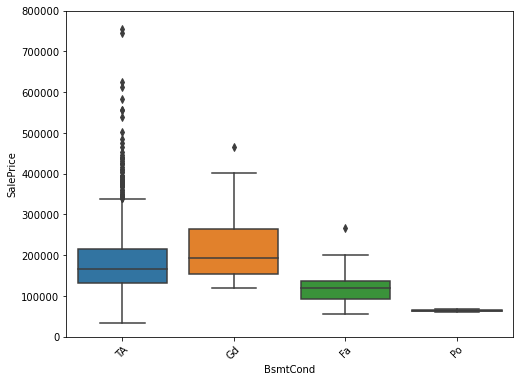

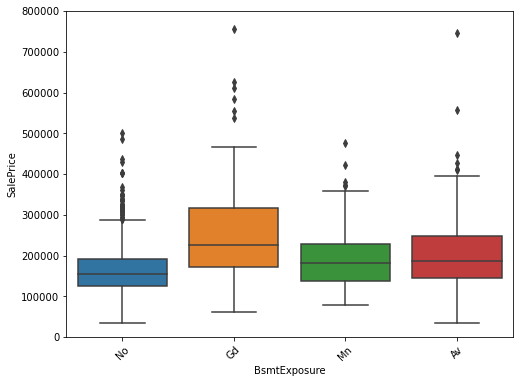

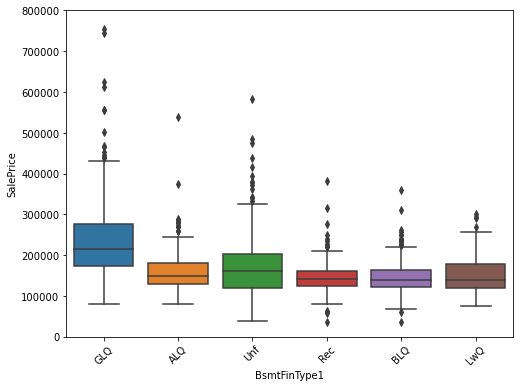

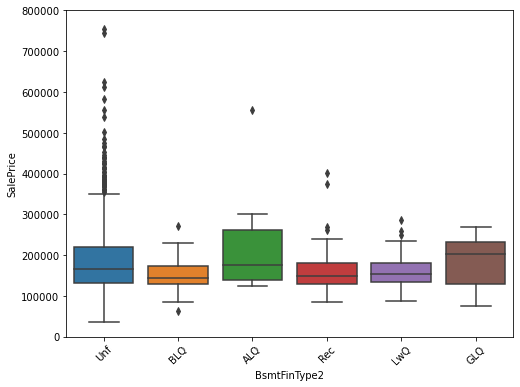

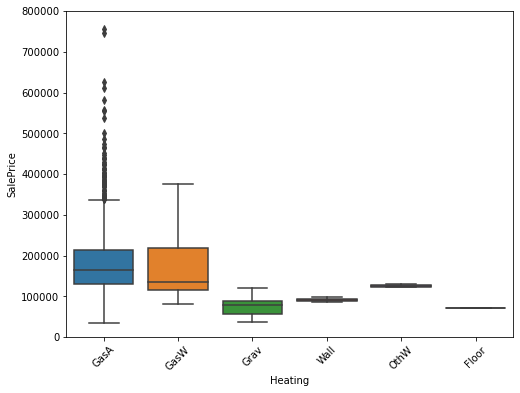

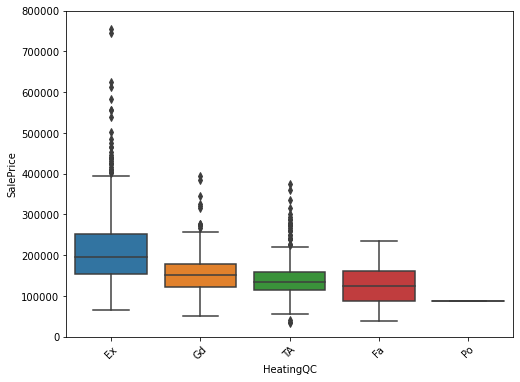

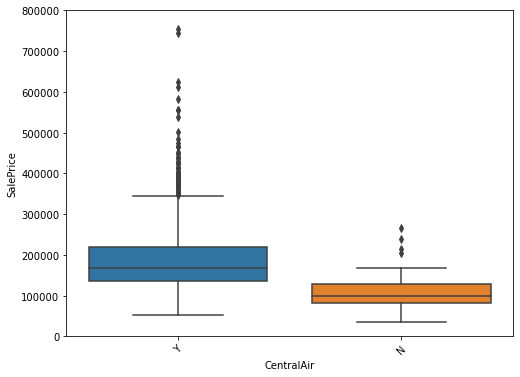

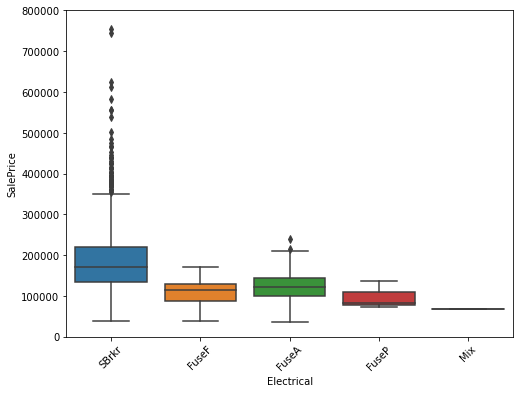

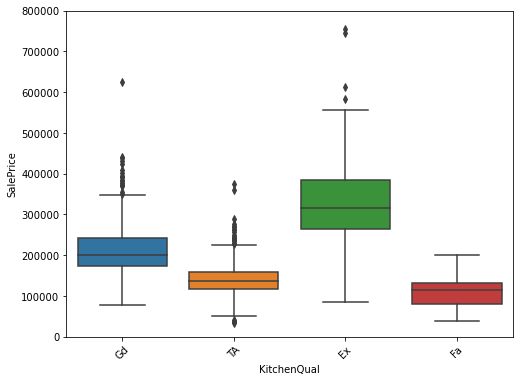

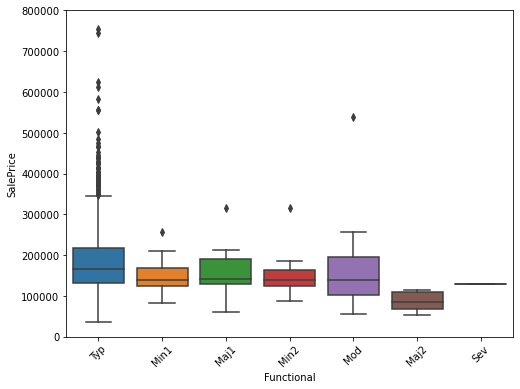

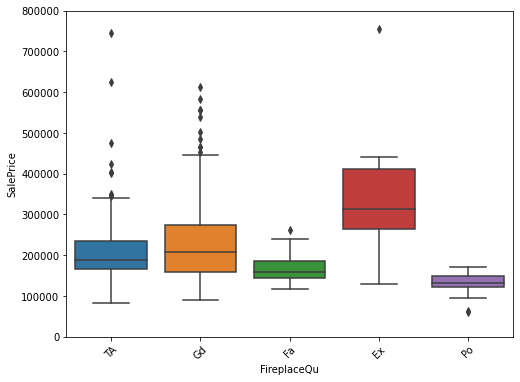

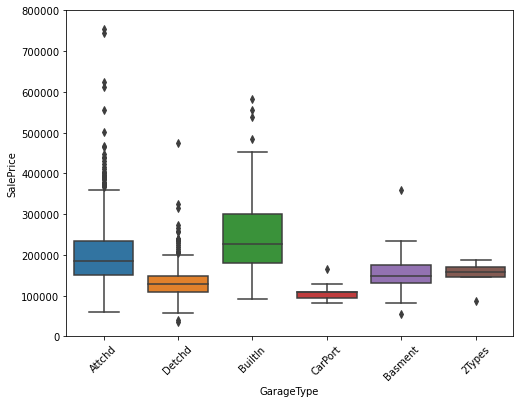

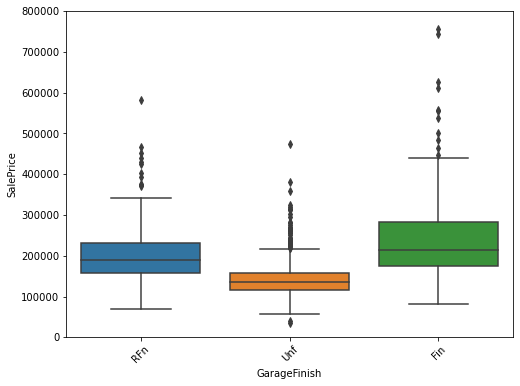

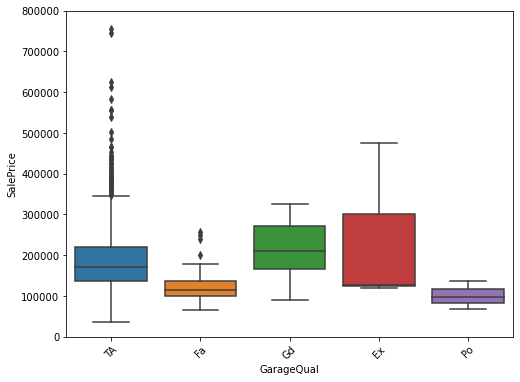

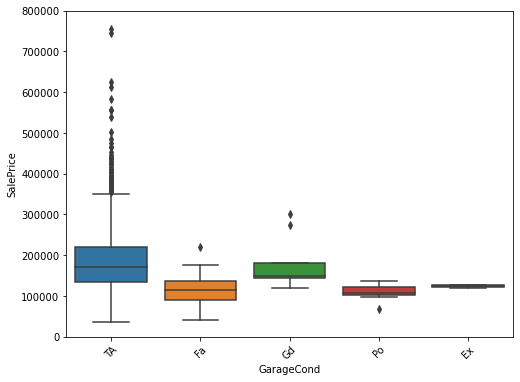

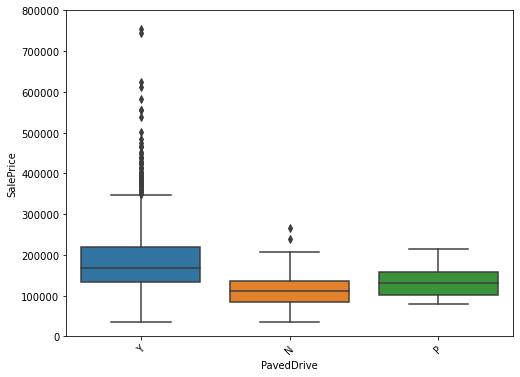

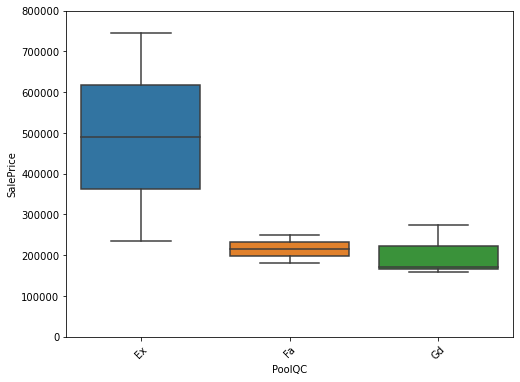

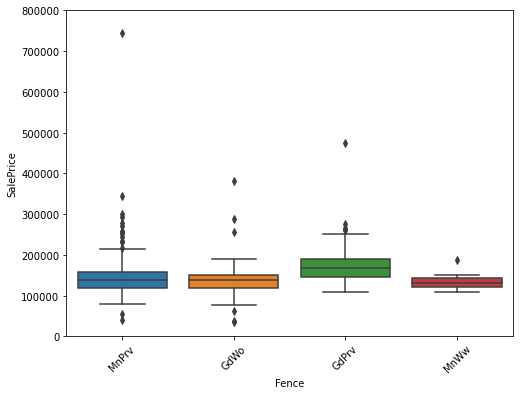

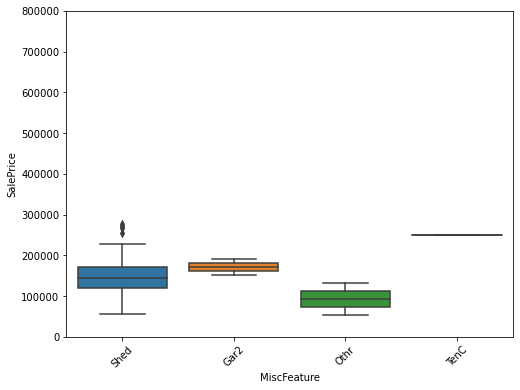

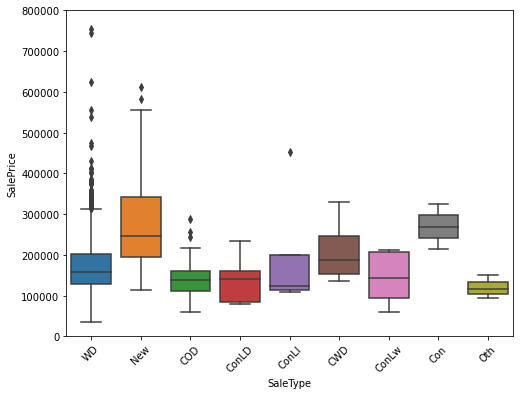

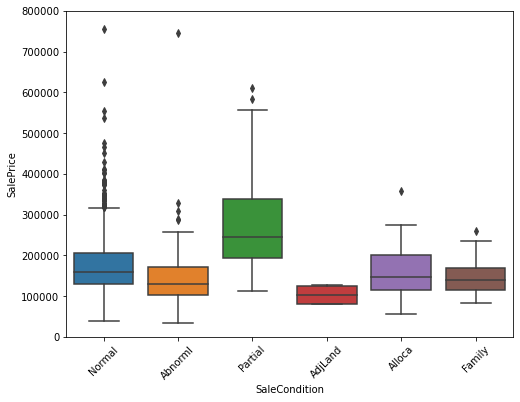

In [32]:
for var in df_train.drop(columns = id_cols).select_dtypes(include='object').columns:
    data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
    f, ax = plt.subplots(figsize=(8, 6))
    fig = sns.boxplot(x=var, y="SalePrice", data=data)
    fig.axis(ymin=0, ymax=800000)
    plt.xticks(rotation=45);

## Some Smart Work

### Correlation matrix heatmap

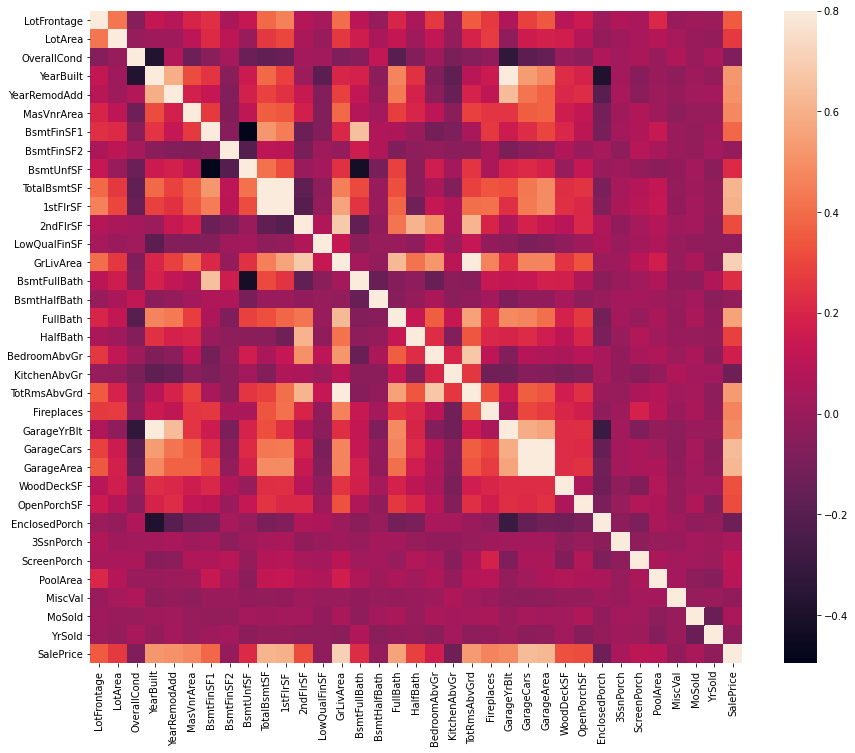

In [33]:
#correlation matrix
corrmat = df_train.drop(columns = 'Id').corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corrmat, vmax=.8, square=True);

### 'SalePrice' correlation matrix - zoomed heatmap

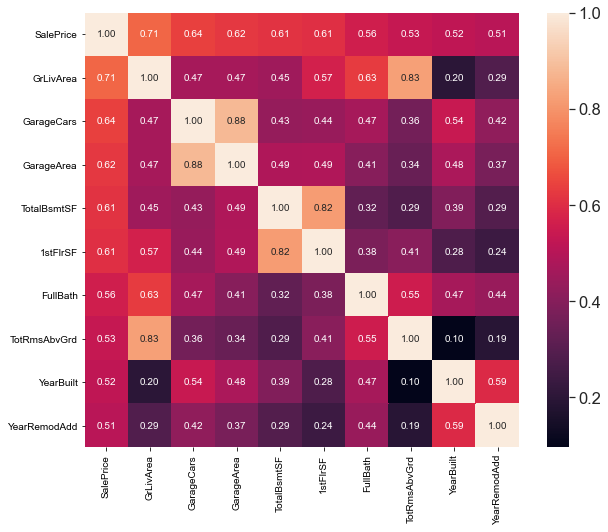

In [34]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
f, ax = plt.subplots(figsize=(10, 8))
sns.set(font_scale=1.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

According to our crystal ball, these are the variables most correlated with 'SalePrice'. My thoughts on this:
Divide in 4 Groups
* 1 to 0.7 - Very Strong Correlation
* 0.7 to 0.5 - Strong Correlation
* 0.5 to 0.3 - Mild Correlation
* <0.3 - Low Correlation


- 'OverallQual', 'GrLivArea' strongly correlated with 'SalePrice'.
- 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF' are also strongly correlated variables. However, the number of cars that fit into the garage is a consequence of the garage area. 'GarageCars' and 'GarageArea' are like twin brothers. You'll never be able to distinguish them. Therefore, we just need one of these variables in our analysis (we can keep 'GarageCars' since its correlation with 'SalePrice' is higher).
- 'TotRmsAbvGrd' and 'GrLivArea', twin brothers again.
- 'YearBuilt' is slightly correlated with 'SalePrice'

Let's proceed to the scatter plots.

### Scatter Plot

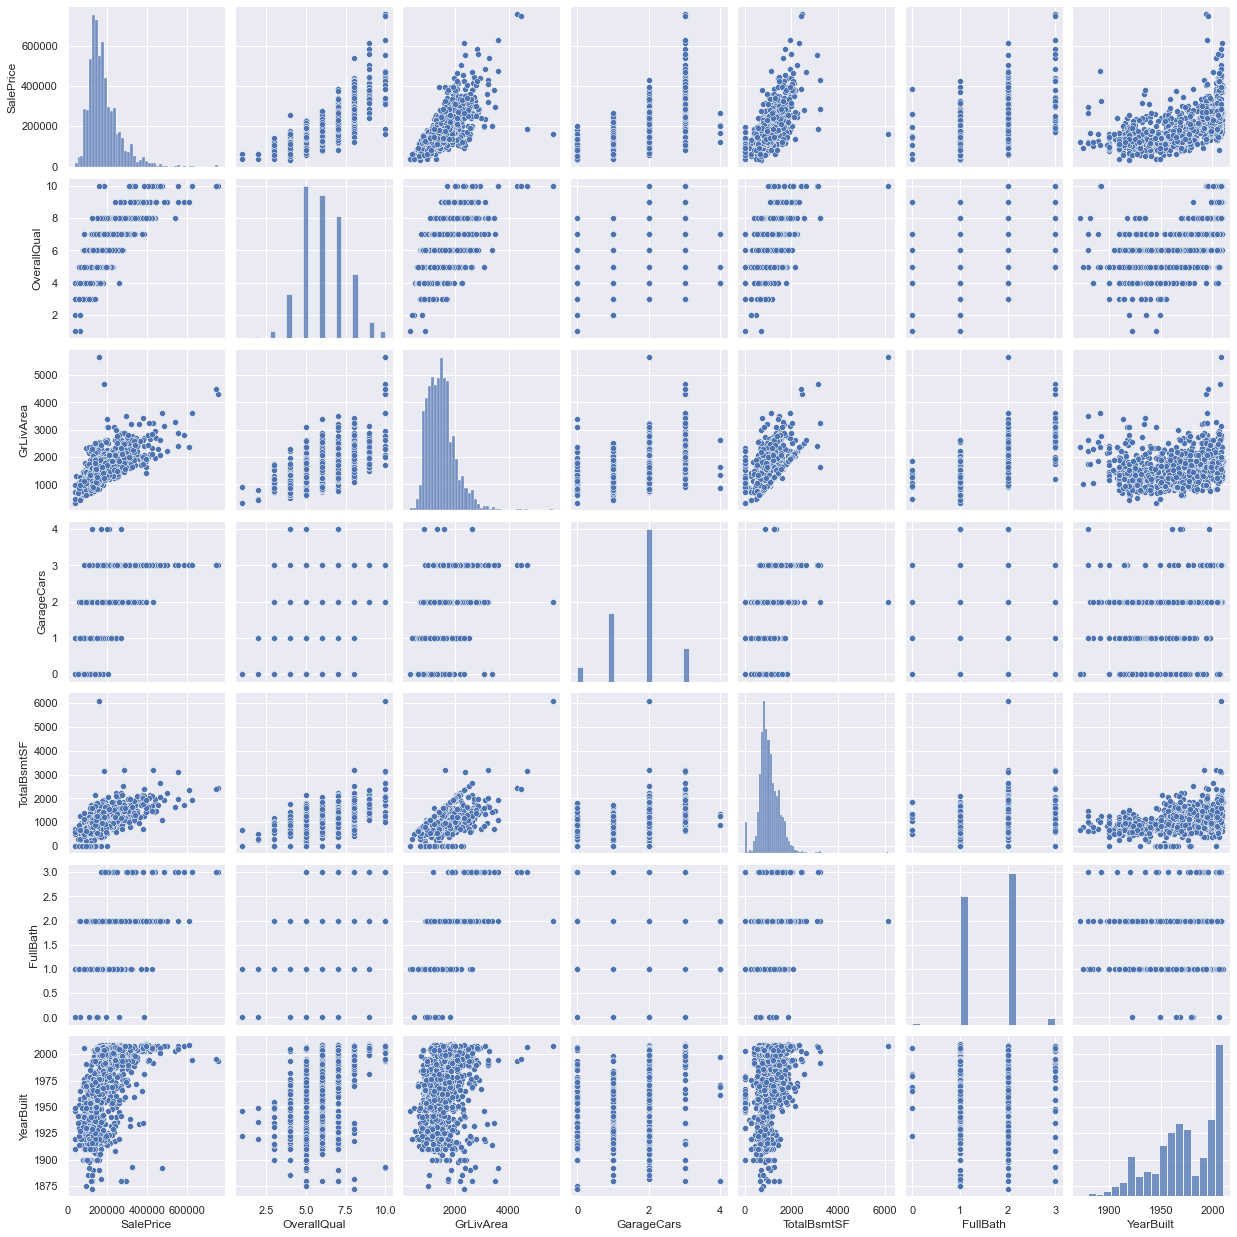

In [35]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

'TotalBsmtSF' and 'GrLiveArea'. In this figure we can see the dots drawing a linear line, which almost acts like a border. It totally makes sense that the majority of the dots stay below that line. Basement areas can be equal to the above ground living area, but it is not expected a basement area bigger than the above ground living area (unless you're trying to buy a bunker).

The plot concerning 'SalePrice' and 'YearBuilt' can also make us think. In the bottom of the 'dots cloud', we see what almost appears to be a shy exponential function (be creative). We can also see this same tendency in the upper limit of the 'dots cloud' (be even more creative). Also, notice how the set of dots regarding the last years tend to stay above this limit (I just wanted to say that prices are increasing faster now).

## Missing Ones

Important questions when thinking about missing data:

* How prevalent is the missing data?
* Is missing data random or does it have a pattern?

The answer to these questions is important for practical reasons because missing data can imply a reduction of the sample size. This can prevent us from proceeding with the analysis. Moreover, from a substantive perspective, we need to ensure that the missing data process is not biased and hidding an inconvenient truth.

In [36]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Total   Percent
PoolQC         1453  0.995205
MiscFeature    1406  0.963014
Alley          1369  0.937671
Fence          1179  0.807534
FireplaceQu     690  0.472603
LotFrontage     259  0.177397
GarageCond       81  0.055479
GarageType       81  0.055479
GarageYrBlt      81  0.055479
GarageFinish     81  0.055479
GarageQual       81  0.055479
BsmtExposure     38  0.026027
BsmtFinType2     38  0.026027
BsmtFinType1     37  0.025342
BsmtCond         37  0.025342
BsmtQual         37  0.025342
MasVnrArea        8  0.005479
MasVnrType        8  0.005479
Electrical        1  0.000685
Utilities         0  0.000000

Let's analyse this to understand how to handle the missing data.

- When more than 15% of the data is missing, we should delete the corresponding variable and pretend it never existed. This means that we will not try any trick to fill the missing data in these cases. According to this, there is a set of variables (e.g. 'PoolQC', 'MiscFeature', 'Alley', etc.) that we should delete. 


- In what concerns the remaining cases, we can see that 'Garage*X*' variables have the same number of missing data. I bet missing data refers to the same set of observations (although I will not check it; it's just 5% and we should not spend 20$ in 5$ problems). Since the most important information regarding garages is expressed by 'GarageCars' and considering that we are just talking about 5% of missing data, I'll delete the mentioned 'Garage*X*' variables. The same logic applies to 'Bsmt*X*' variables.

- 'MasVnrArea' and 'MasVnrType', we can consider that these variables are not essential. Furthermore, they have a strong correlation with 'YearBuilt' and 'OverallQual' which are already considered. Thus, we will not lose information if we delete 'MasVnrArea' and 'MasVnrType'.

- Finally, we have one missing observation in 'Electrical'. Since it is just one observation, we'll delete this observation and keep the variable.

In summary, to handle missing data, we'll delete all the variables with missing data, except the variable 'Electrical'. In 'Electrical' we'll just delete the observation with missing data.

In [37]:
#dealing with missing data
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max() #just checking that there's no missing data missing...

0

## Outliers

Outliers is also something that we should be aware of. Why? Because outliers can markedly affect our models and can be a valuable source of information, providing us insights about specific behaviours.

Outliers is a complex subject and it deserves more attention. Here, we'll just do a quick analysis through the standard deviation of 'SalePrice' and a set of scatter plots.

### Univariate analysis

In [38]:
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


How 'SalePrice' looks with her new clothes:

* Low range values are similar and not too far from 0.
* High range values are far from 0 and the 7.something values are really out of range.

For now, we'll not consider any of these values as an outlier but we should be careful with those two 7.something values.

### Bivariate analysis

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


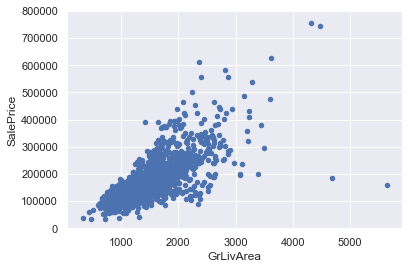

In [39]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

* The two values with bigger 'GrLivArea' seem strange and they are not following the crowd. We can speculate why this is happening. Maybe they refer to agricultural area and that could explain the low price. I'm not sure about this but I'm quite confident that these two points are not representative of the typical case. Therefore, we'll define them as outliers and delete them.
* The two observations in the top of the plot are those 7.something observations that we said we should be careful about. They look like two special cases, however they seem to be following the trend. For that reason, we will keep them.

In [40]:
#deleting points
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


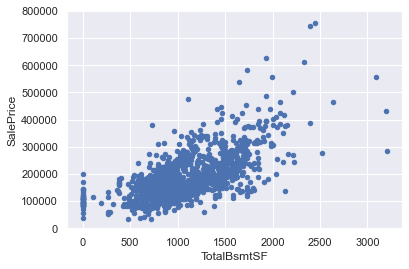

In [41]:
#bivariate analysis saleprice/grlivarea
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

We can feel tempted to eliminate some observations (e.g. TotalBsmtSF > 3000) but I suppose it's not worth it. We can live with that, so we'll not do anything.

## More Closer to ML

We already did some data cleaning and discovered a lot about 'SalePrice'. Now it's time to go deep and understand how 'SalePrice' complies with the statistical assumptions that enables us to apply multivariate techniques.

According to [Hair et al. (2013)](https://amzn.to/2uC3j9p), four assumptions should be tested:

* <b>Normality</b> - When we talk about normality what we mean is that the data should look like a normal distribution. This is important because several statistic tests rely  on this (e.g. t-statistics). In this exercise we'll just check univariate normality for 'SalePrice' (which is a limited approach). Remember that univariate normality doesn't ensure multivariate normality (which is what we would like to have), but it helps. Another detail to take into account is that in big samples (>200 observations) normality is not such an issue. However, if we solve normality, we avoid a lot of other problems (e.g. heteroscedacity) so that's the main reason why we are doing this analysis.

* <b>Homoscedasticity</b> - I just hope I wrote it right. Homoscedasticity refers to the 'assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s)' [(Hair et al., 2013)](https://amzn.to/2uC3j9p). Homoscedasticity is desirable because we want the error term to be the same across all values of the independent variables.

* <b>Linearity</b>- The most common way to assess linearity is to examine scatter plots and search for linear patterns. If patterns are not linear, it would be worthwhile to explore data transformations. However, we'll not get into this because most of the scatter plots we've seen appear to have linear relationships.

* <b>Absence of correlated errors</b> - Correlated errors, like the definition suggests, happen when one error is correlated to another. For instance, if one positive error makes a negative error systematically, it means that there's a relationship between these variables. This occurs often in time series, where some patterns are time related. We'll also not get into this. However, if you detect something, try to add a variable that can explain the effect you're getting. That's the most common solution for correlated errors.

What do you think Elvis would say about this long explanation? 'A little less conversation, a little more action please'? Probably... By the way, do you know what was Elvis's last great hit?

(...)

The bathroom floor.

### Normality

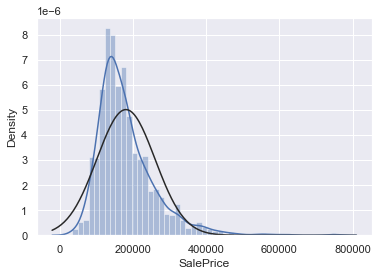

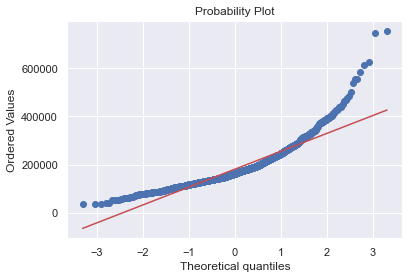

In [42]:
#histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

Ok, 'SalePrice' is not normal. It shows 'peakedness', positive skewness and does not follow the diagonal line.

But everything's not lost. A simple data transformation can solve the problem. This is one of the awesome things you can learn in statistical books: in case of positive skewness, log transformations usually works well.

#### Log Transformation

In [43]:
#applying log transformation
df_train['SalePrice'] = np.log(df_train['SalePrice'])

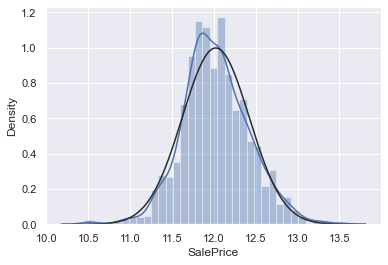

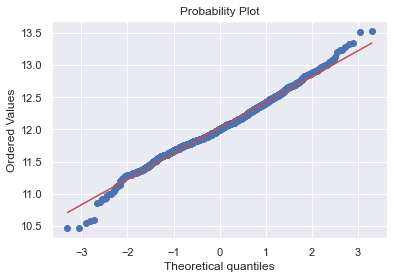

In [44]:
#transformed histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

### Homoscedasticity

The best approach to test homoscedasticity for two metric variables is graphically. Departures from an equal dispersion are shown by such shapes as cones (small dispersion at one side of the graph, large dispersion at the opposite side) or diamonds (a large number of points at the center of the distribution).

Starting by 'SalePrice' and 'GrLivArea'...

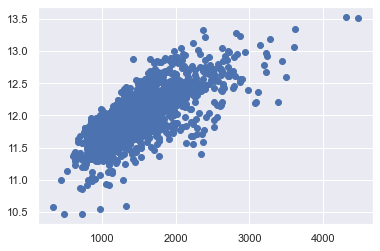

In [45]:
#scatter plot
plt.scatter(df_train['GrLivArea'], df_train['SalePrice']);

Older versions of this scatter plot (previous to log transformations), had a conic shape (go back and check 'Scatter plots between 'SalePrice' and correlated variables (move like Jagger style)'). As you can see, the current scatter plot doesn't have a conic shape anymore. That's the power of normality! Just by ensuring normality in some variables, we solved the homoscedasticity problem.

Now let's check 'SalePrice' with 'TotalBsmtSF'.

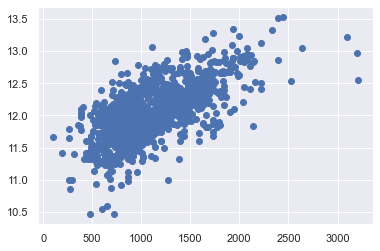

In [46]:
#scatter plot
plt.scatter(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF']>0]['SalePrice']);

We can say that, in general, 'SalePrice' exhibit equal levels of variance across the range of 'TotalBsmtSF'. Cool!

# References

- https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python
- https://www.kaggle.com/pavansanagapati/a-simple-tutorial-on-exploratory-data-analysis

# Things to Read
- Basic Stats
- Box Plots
- Correlation